In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import os
import glob

<IPython.core.display.Javascript object>

In [3]:
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")


<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [5]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [6]:
def read_csv_files_grouped(csv_files, plant, header=[0, 1]):
    results = []
    for filepath in csv_files:
        df = pd.read_csv(filepath, header=header, low_memory=False)
        df["plant"] = plant  # Add the 'plant' column
        results.append(df)
    df = pd.concat(results, ignore_index=True)
    return df

<IPython.core.display.Javascript object>

In [7]:
def read_csv_files_full(csv_files, plant):
    results = []
    for filepath in csv_files:
        df = pd.read_csv(filepath, low_memory=False)
        df["plant"] = plant  # Add the 'plant' column
        results.append(df)
    df = pd.concat(results, ignore_index=True)
    return df

<IPython.core.display.Javascript object>

### Renaming the Columns

In [8]:
def preprocess_rename_columns(df):
    df.columns = pd.MultiIndex.from_tuples(
        list(
            {
                col: (col[0], "") if "Unnamed" in col[1] else col for col in df.columns
            }.values()
        )
    )
    return df

<IPython.core.display.Javascript object>

### Changing the order_of columns Columns

In [9]:
def preprocess_change_columns_order(df, column, pos):
    # Get the list of columns
    cols = df.columns.tolist()
    # Remove the specified column
    cols.remove(column)
    # Insert the column at the desired position
    cols.insert(pos, column)
    # Reorder the DataFrame columns
    return df[cols]

<IPython.core.display.Javascript object>

In [10]:
def read_csv_files_path(csv_files_path_dict, path, plant):
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    csv_files_path_dict[plant] = csv_files
    return csv_files_path_dict

<IPython.core.display.Javascript object>

# Reading The files

In [11]:
csv_files_path_grouped = dict()
csv_files_path_full = dict()

<IPython.core.display.Javascript object>

### 209

In [12]:
plants_209 = ["w"]

for plant in plants_209:
    path_grouped = f"/home/peressim/projects/ccs28-ml-modelling/reports/results/local_models/209/{plant}/grouped/"
    path_full = f"/home/peressim/projects/ccs28-ml-modelling/reports/results/local_models/209/{plant}/full/"
    csv_files_path_full = read_csv_files_path(csv_files_path_full, path_full, plant)
    csv_files_path_grouped = read_csv_files_path(
        csv_files_path_grouped, path_grouped, plant
    )

<IPython.core.display.Javascript object>

### Reading all data

#### Full

In [13]:
dfs_plant = dict()
column = ("plant", "")
pos = 2

for plant, csv_files in csv_files_path_full.items():
    df = read_csv_files_full(csv_files, plant)
    df["plant"] = plant
    dfs_plant[plant] = df

<IPython.core.display.Javascript object>

In [14]:
df_full = pd.concat(dfs_plant.values(), ignore_index=True)

<IPython.core.display.Javascript object>

In [15]:
df_full.shape

(5579, 23)

<IPython.core.display.Javascript object>

In [16]:
filter_df = df_full[df_full["R2 Test"] < 0].reset_index(drop=True)

filter_df["CP"] = (
    filter_df["Company"].astype(str) + "_" + filter_df["plant"].astype(str)
)

filter_df["CP"].unique()

print(filter_df.shape)

(1311, 24)


<IPython.core.display.Javascript object>

In [17]:
patterns = [
    "Chemical + Mineralogical + Feature Engineering",
    "Chemical + Mineralogical + CS7 + One-Hot",
    "Chemical + Mineralogical + Physical + One-Hot",
    "Chemical + Mineralogical + CS3 + One-Hot",
    "Chemical + Mineralogical + CS3 + CS7 + One-Hot",
    "Chemical + Mineralogical + One-Hot",
    "Chemical + Mineralogical + CS1 + CS3 + CS7 + One-Hot",
    "Chemical + Mineralogical + CS1 + CS3 + One-Hot",
    "Chemical + Mineralogical + CS1 + One-Hot",
    "Chemical + Mineralogical + CS2 + One-Hot",
    "Chemical + Feature Engineering",
]

FEATURES_TO_REPLACE_1 = {
    "Chemical + Mineralogical + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1 + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1 + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS2": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS7": "Chemical + Mineralogical + Early CS",
}

FEATURES_TO_REPLACE_2 = {
    "Chemical": "Chemical + Mineralogical",
    "Chemical + Properties CS Less": "Chemical + Mineralogical + Physical - Early CS",
    "Chemical + Mineralogical + Properties CS Less": "Chemical + Mineralogical + Physical - Early CS",
    "Chemical + Physical": "Chemical + Mineralogical + Physical",
}

df_full = df_full[~df_full["Features"].apply(lambda x: x in patterns)].reset_index(
    drop=True
)

df_full = df_full[~df_full["Cross Validation"].eq("Out of time Split")].reset_index(
    drop=True
)

# removing afterwards
df_full = df_full[~df_full["Cross Validation"].eq("Repeated KFold")].reset_index(
    drop=True
)

df_full["Features_bkp"] = df_full["Features"].copy()
df_full["Features"] = df_full["Features"].replace(FEATURES_TO_REPLACE_1)

df_full["Features"] = df_full["Features"].replace(FEATURES_TO_REPLACE_2)


# removing afterwards
df_full = df_full[
    ~df_full["Features"].eq("Chemical + Mineralogical + Early CS")
].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [18]:
df_full["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [19]:
df_full["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS',
       'Chemical + Mineralogical + Physical', 'Chemical + Mineralogical'],
      dtype=object)

<IPython.core.display.Javascript object>

In [20]:
df_full["Features_bkp"].unique()

array(['Chemical + Properties CS Less', 'Chemical + Physical', 'Chemical'],
      dtype=object)

<IPython.core.display.Javascript object>

In [21]:
df_full.shape

(1335, 24)

<IPython.core.display.Javascript object>

In [22]:
df_full[["RMSE Test", "MAE Test", "MAPE Test", "R2 Test"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RMSE Test,1335.0,5.06,4.63,0.74,1.65,3.88,7.36,36.49
MAE Test,1335.0,4.05,3.54,0.58,1.27,2.98,5.88,24.80
MAPE Test,1335.0,0.09,0.08,0.01,0.03,0.07,0.14,0.55
R2 Test,1335.0,-1.22,6.73,-90.63,-1.09,0.38,0.90,0.98


<IPython.core.display.Javascript object>

In [23]:
df_full[df_full["R2 Test"] < 0][["Company", "plant"]]["plant"].nunique()

1

<IPython.core.display.Javascript object>

In [24]:
df_full[df_full["R2 Test"].eq(df_full["R2 Test"].min())]

,Category,Company,Plant,Features,Data Shape,Timesteps,Model,Model Params,Scaler,Scaler Params,...,RMSE Train,MAE Train,MAPE Train,R2 Train,RMSE Test,MAE Test,MAPE Test,R2 Test,plant,Features_bkp
542,Local Model,209,W,Chemical + Mineralogical,"(1011, 26)",7.0,LSTM,NaN,Standard Scaler,NaN,...,1.400282,1.136213,0.025951,0.91953,36.47628,22.690057,0.552757,-90.625668,w,Chemical
547,Local Model,209,W,Chemical + Mineralogical,"(1011, 26)",7.0,LSTM,NaN,Standard Scaler,NaN,...,1.400282,1.136213,0.025951,0.91953,36.47628,22.690057,0.552757,-90.625668,w,Chemical
552,Local Model,209,W,Chemical + Mineralogical,"(1011, 26)",7.0,LSTM,NaN,Standard Scaler,NaN,...,1.400282,1.136213,0.025951,0.91953,36.47628,22.690057,0.552757,-90.625668,w,Chemical


<IPython.core.display.Javascript object>

In [25]:
df_full[(df_full["R2 Test"].eq(df_full["R2 Test"].min()))]["Cross Validation"]

542    Blocking Time Series Split
547    Blocking Time Series Split
552    Blocking Time Series Split
Name: Cross Validation, dtype: object

<IPython.core.display.Javascript object>

In [26]:
filter_df = df_full[df_full["R2 Test"] < 0].reset_index(drop=True)

print(filter_df.shape)

(532, 24)


<IPython.core.display.Javascript object>

# Example for thesis

In [27]:
# Function to compare two models strictly based on means only
def strictly_dominates(model1, model2):
    """Return True if model1 strictly dominates model2, False otherwise."""
    # Check if model1 is at least as good as model2 in all metrics
    at_least_as_good = (
        model1["RMSE_mean"] <= model2["RMSE_mean"]
        and model1["MAE_mean"] <= model2["MAE_mean"]
        and model1["MAPE_mean"] <= model2["MAPE_mean"]
        and model1["R2_mean"] >= model2["R2_mean"]
    )

    # Check if model1 is strictly better in at least one metric
    strictly_better_in_one = (
        model1["RMSE_mean"] < model2["RMSE_mean"]
        or model1["MAE_mean"] < model2["MAE_mean"]
        or model1["MAPE_mean"] < model2["MAPE_mean"]
        or model1["R2_mean"] > model2["R2_mean"]
    )

    # Model1 strictly dominates Model2 if it is at least as good in all metrics and
    # strictly better in at least one metric
    return at_least_as_good and strictly_better_in_one

<IPython.core.display.Javascript object>

In [28]:
# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1

    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []

    while queue:
        u = queue.popleft()
        topo_order.append(u)

        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    return topo_order

<IPython.core.display.Javascript object>

Dominating Models: ['Model1']
Non-Dominated Models: ['Model4']
Failing Models: ['Model2', 'Model3']
Models in order of dominance: ['Model1', 'Model4', 'Model2', 'Model3']


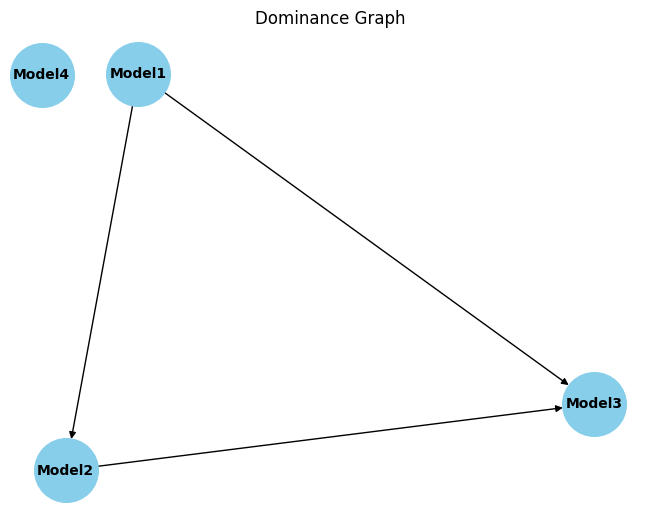

<IPython.core.display.Javascript object>

In [29]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict

# Sample DataFrame containing the results for each model, including standard deviations
data = {
    'Model': ['Model1', 'Model2', 'Model3', 'Model4'],
    'RMSE_mean': [1.5, 2.0, 2.5, 2.1],
    'RMSE_std': [0.2, 0.25, 0.3, 0.25],
    'MAE_mean': [1.0, 1.5, 2.0, 1.4],
    'MAE_std': [0.1, 0.15, 0.2, 0.12],
    'MAPE_mean': [3.0, 4.0, 5.0, 2.8],
    'MAPE_std': [0.5, 0.6, 0.7, 0.4],
    'R2_mean': [0.9, 0.85, 0.8, 0.75],
    'R2_std': [0.05, 0.06, 0.07, 0.08]
}


df = pd.DataFrame(data)



# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []
    
    while queue:
        u = queue.popleft()
        topo_order.append(u)
        
        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)
    
    return topo_order

# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominating_models = [df['Model'].iloc[i] for i in range(n) if dominates_any[i] and not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i]]

print("Dominating Models:", dominating_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the dominance graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(dominance_graph)
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G, seed=48, k=1.5)
#pos = nx.kamada_kawai_layout(G)

pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.4, 0.6])

nx.draw(G, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)
plt.title("Dominance Graph")
plt.show()


Dominating Models: ['A']
Non-Dominated Models: ['D']
Failing Models: ['B', 'C']
Models in order of dominance: ['A', 'D', 'B', 'C']


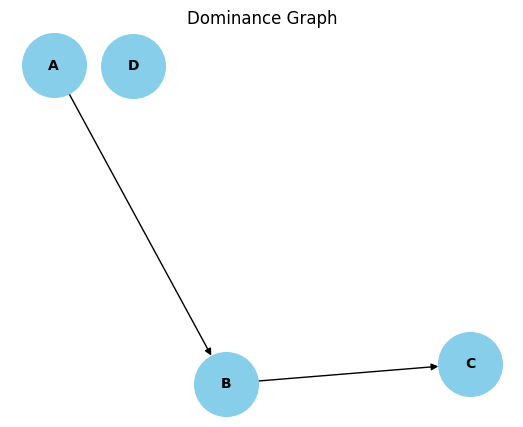

<IPython.core.display.Javascript object>

In [30]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# Sample DataFrame containing the results for each model, including standard deviations
data = {
    #'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
    'Model': ['A', 'B', 'C', 'D'],
    'RMSE_mean': [1.5, 2.0, 2.5, 2.1],
    'RMSE_std': [0.2, 0.25, 0.3, 0.25],
    'MAE_mean': [1.0, 1.5, 2.0, 1.4],
    'MAE_std': [0.1, 0.15, 0.2, 0.12],
    'MAPE_mean': [3.0, 4.0, 5.0, 2.8],
    'MAPE_std': [0.5, 0.6, 0.7, 0.4],
    'R2_mean': [0.9, 0.85, 0.8, 0.75],
    'R2_std': [0.05, 0.06, 0.07, 0.08]
}

df = pd.DataFrame(data)

# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Create the NetworkX graph
G = nx.DiGraph(dominance_graph)

# Apply transitive reduction
G_reduced = nx.transitive_reduction(G)


# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominant_models = [df['Model'].iloc[i] for i in range(n) if dominates_any[i] and not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i]]

print("Dominating Models:", dominant_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the reduced dominance graph
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G_reduced, seed=48, k=1.5)
# pos = nx.kamada_kawai_layout(G)

pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
# pos[1] = pos[0] + 0.02
# pos[2] = pos[1] + 0.05


#pos[1] = pos[1] + np.array([0.0, 0.2])
# pos[2] = pos[2] + np.array([0.01, 0.2])
# pos[2] = np.mean([pos[2], pos[0]], axis=1)
# pos[0] = pos[2] - pos[0]

fig, axes = plt.subplots(1, 1, figsize=(6.5, 5), sharex=False)  # 1 row, 2 columns
nx.draw(G_reduced, pos, ax=axes, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

# pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
#nx.draw(G_reduced, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

#plt.title("Reduced Dominance Graph")
plt.title("Dominance Graph")
plt.show()


In [31]:
data = {
    #'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
    "Model": ["A", "B", "C", "D"],
    "RMSE_mean": [1.5, 2.0, 2.5, 2.1],
    "RMSE_std": [0.2, 0.25, 0.3, 0.25],
    "MAE_mean": [1.0, 1.5, 2.0, 1.4],
    "MAE_std": [0.1, 0.15, 0.2, 0.12],
    "MAPE_mean": [3.0, 4.0, 5.0, 2.8],
    "MAPE_std": [0.5, 0.6, 0.7, 0.4],
    "R2_mean": [0.9, 0.85, 0.8, 0.75],
    "R2_std": [0.05, 0.06, 0.07, 0.08],
}

df = pd.DataFrame(data)

<IPython.core.display.Javascript object>

In [32]:
df[["Model", "RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"]]

# df = df.set_index("Model")

df

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std
0,A,1.5,0.20,1.0,0.10,3.0,0.5,0.90,0.05
1,B,2.0,0.25,1.5,0.15,4.0,0.6,0.85,0.06
2,C,2.5,0.30,2.0,0.20,5.0,0.7,0.80,0.07
3,D,2.1,0.25,1.4,0.12,2.8,0.4,0.75,0.08


<IPython.core.display.Javascript object>

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_metrics = scaler.fit_transform(
    df[["RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"]]
)

# Creating a new dataframe with standardized values
standardized_df = pd.DataFrame(
    standardized_metrics,
    columns=["RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"],
)

# Summing all metrics and subtracting R2_mean
standardized_df["Result"] = (
    standardized_df[["RMSE_mean", "MAE_mean", "MAPE_mean"]].sum(axis=1)
    - standardized_df["R2_mean"]
)

<IPython.core.display.Javascript object>

In [34]:
standardized_df["Model"] = df["Model"]
standardized_df

,RMSE_mean,MAE_mean,MAPE_mean,R2_mean,Result,Model
0,-1.473911,-1.333539,-0.797724,1.341641,-4.946814,A
1,-0.070186,0.070186,0.341882,0.447214,-0.105332,B
2,1.333539,1.473911,1.481487,-0.447214,4.736151,C
3,0.210559,-0.210559,-1.025645,-1.341641,0.315996,D


<IPython.core.display.Javascript object>

Dominating Models: ['A']
Non-Dominated Models: []
Failing Models: ['B', 'C', 'D']
Models in order of dominance: ['A', 'B', 'D', 'C']


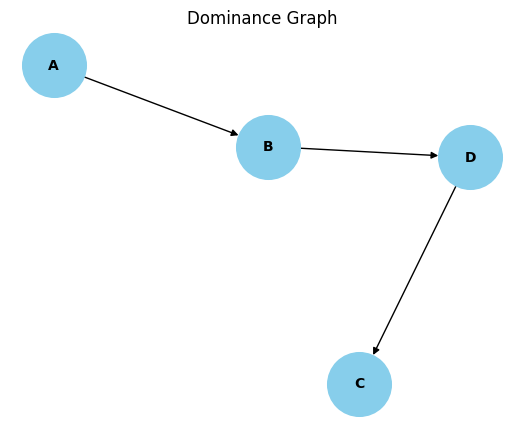

<IPython.core.display.Javascript object>

In [35]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

df = standardized_df
# Function to compare two models strictly
def strictly_dominates(model1, model2):
    """Return True if model1 strictly dominates model2, False otherwise."""
    return model1['Result'] < model2['Result']

# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Create the NetworkX graph
G = nx.DiGraph(dominance_graph)

# Apply transitive reduction
G_reduced = nx.transitive_reduction(G)

# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []
    
    while queue:
        u = queue.popleft()
        topo_order.append(u)
        
        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)
    
    return topo_order

# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominant_models = [df['Model'].iloc[i] for i in range(n) if dominates_any[i] and not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i]]

print("Dominating Models:", dominant_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the reduced dominance graph
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G_reduced, seed=48, k=1.5)
# pos = nx.kamada_kawai_layout(G)

# pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
# pos[1] = pos[0] + 0.02
# pos[2] = pos[1] + 0.05


#pos[1] = pos[1] + np.array([0.0, 0.2])
# pos[2] = pos[2] + np.array([0.01, 0.2])
# pos[2] = np.mean([pos[2], pos[0]], axis=1)
# pos[0] = pos[2] - pos[0]

fig, axes = plt.subplots(1, 1, figsize=(6.5, 5), sharex=False)  # 1 row, 2 columns
nx.draw(G_reduced, pos, ax=axes, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

# pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
#nx.draw(G_reduced, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

#plt.title("Reduced Dominance Graph")
plt.title("Dominance Graph")
plt.show()


In [36]:
dominance_matrix

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False, False],
       [False, False,  True, False]])

<IPython.core.display.Javascript object>

Dominant Models: ['Model1', 'Model4']
Non-Dominated Models: ['Model4']
Failing Models: ['Model3']
Models in order of dominance: ['Model1', 'Model4', 'Model2', 'Model3']


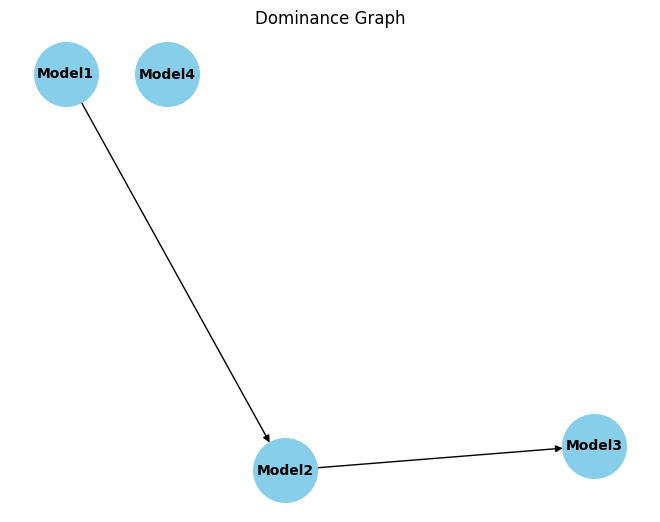

<IPython.core.display.Javascript object>

In [37]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# Sample DataFrame containing the results for each model, including standard deviations
data = {
    'Model': ['Model1', 'Model2', 'Model3', 'Model4'],
    'RMSE_mean': [1.5, 2.0, 2.5, 2.1],
    'RMSE_std': [0.2, 0.25, 0.3, 0.25],
    'MAE_mean': [1.0, 1.5, 2.0, 1.4],
    'MAE_std': [0.1, 0.15, 0.2, 0.12],
    'MAPE_mean': [3.0, 4.0, 5.0, 2.8],
    'MAPE_std': [0.5, 0.6, 0.7, 0.4],
    'R2_mean': [0.9, 0.85, 0.8, 0.75],
    'R2_std': [0.05, 0.06, 0.07, 0.08]
}

df = pd.DataFrame(data)

# Function to compare two models strictly
def strictly_dominates(model1, model2):
    """Return True if model1 strictly dominates model2, False otherwise."""
    return (model1['RMSE_mean'] < model2['RMSE_mean'] and
            model1['MAE_mean'] < model2['MAE_mean'] and
            model1['MAPE_mean'] < model2['MAPE_mean'] and
            model1['R2_mean'] > model2['R2_mean'])

# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Create the NetworkX graph
G = nx.DiGraph(dominance_graph)

# Apply transitive reduction
G_reduced = nx.transitive_reduction(G)

# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []
    
    while queue:
        u = queue.popleft()
        topo_order.append(u)
        
        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)
    
    return topo_order

# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominant_models = [df['Model'].iloc[i] for i in range(n) if not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i] and not dominates_any[i]]

print("Dominant Models:", dominant_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the reduced dominance graph
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G_reduced, seed=48, k=1.5)

pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])

nx.draw(G_reduced, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)
plt.title("Dominance Graph")
plt.show()


In [38]:
df_full.shape

(1335, 24)

<IPython.core.display.Javascript object>

In [39]:
df_full["plant"].unique()

array(['w'], dtype=object)

<IPython.core.display.Javascript object>

In [40]:
df_full_209 = df_full[df_full["plant"].isin(["partner_i", "partner_ii", "partner_iv"])].reset_index(
    drop=True
)
df_full_209 = df_full[~df_full["plant"].isin(["partner_i", "partner_ii", "partner_iv"])].reset_index(
    drop=True
)

<IPython.core.display.Javascript object>

In [41]:
df_full.shape

(1335, 24)

<IPython.core.display.Javascript object>

In [42]:
df_full_209.shape

(1335, 24)

<IPython.core.display.Javascript object>

In [43]:
df_full_209.shape

(1335, 24)

<IPython.core.display.Javascript object>

In [44]:
df_full_209[["RMSE Test", "MAE Test", "MAPE Test", "R2 Test"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RMSE Test,1335.0,5.06,4.63,0.74,1.65,3.88,7.36,36.49
MAE Test,1335.0,4.05,3.54,0.58,1.27,2.98,5.88,24.80
MAPE Test,1335.0,0.09,0.08,0.01,0.03,0.07,0.14,0.55
R2 Test,1335.0,-1.22,6.73,-90.63,-1.09,0.38,0.90,0.98


<IPython.core.display.Javascript object>

In [45]:
df_full_209[["RMSE Test", "MAE Test", "MAPE Test", "R2 Test"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RMSE Test,1335.0,5.06,4.63,0.74,1.65,3.88,7.36,36.49
MAE Test,1335.0,4.05,3.54,0.58,1.27,2.98,5.88,24.80
MAPE Test,1335.0,0.09,0.08,0.01,0.03,0.07,0.14,0.55
R2 Test,1335.0,-1.22,6.73,-90.63,-1.09,0.38,0.90,0.98


<IPython.core.display.Javascript object>

# Analysis (full results)

In [46]:
df_full_209 = df_full[~df_full["plant"].isin(["partner_i", "partner_ii", "partner_iv"])].reset_index(
    drop=True
)

<IPython.core.display.Javascript object>

## 209

In [47]:
df_full_209.shape

(1335, 24)

<IPython.core.display.Javascript object>

In [48]:
df_full_209["Company"].unique()

array([209])

<IPython.core.display.Javascript object>

### Variable Grouping: CM

In [49]:
df_full_209["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS',
       'Chemical + Mineralogical + Physical', 'Chemical + Mineralogical'],
      dtype=object)

<IPython.core.display.Javascript object>

In [50]:
df_results_full_cm = (
    df_full_209[df_full_209["Features"].eq("Chemical + Mineralogical")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [51]:
df_results_full_cm["Features"].unique()

array(['Chemical + Mineralogical'], dtype=object)

<IPython.core.display.Javascript object>

In [52]:
df_results_full_cm.shape

(445, 24)

<IPython.core.display.Javascript object>

#### K-Fold

In [53]:
df_results_full_cm["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [54]:
df_results_full_cm_kf = (
    df_results_full_cm[df_results_full_cm["Cross Validation"].eq("Repeated KFold")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [55]:
df_results_full_cm_kf["Cross Validation"].unique()

array([], dtype=object)

<IPython.core.display.Javascript object>

In [56]:
df_results_full_cm_kf.shape

(0, 24)

<IPython.core.display.Javascript object>

In [57]:
df_results_full_cm_kf.groupby(["Company", "Model", "Timesteps"], dropna=False)[
    "RMSE Test"
].mean().shape

(0,)

<IPython.core.display.Javascript object>

### Blocking time series

In [58]:
df_results_full_cm["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [59]:
df_results_full_cm_btss = (
    df_results_full_cm[
        df_results_full_cm["Cross Validation"].eq("Blocking Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [60]:
df_results_full_cm_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [61]:
df_results_full_cm_btss.shape

(185, 24)

<IPython.core.display.Javascript object>

In [62]:
df_results_full_cm_btss.groupby(
    ["Company", "Plant", "Model", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(15,)

<IPython.core.display.Javascript object>

### Time Series Split

In [63]:
df_results_full_cm["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [64]:
df_results_full_cm_tss = (
    df_results_full_cm[df_results_full_cm["Cross Validation"].eq("Time Series Split")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [65]:
df_results_full_cm_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [66]:
df_results_full_cm_tss.shape

(260, 24)

<IPython.core.display.Javascript object>

In [67]:
df_results_full_cm_tss.groupby(
    ["Company", "Plant", "Model", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(20,)

<IPython.core.display.Javascript object>

### Variable Grouping: CM-P

In [68]:
df_full_209["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS',
       'Chemical + Mineralogical + Physical', 'Chemical + Mineralogical'],
      dtype=object)

<IPython.core.display.Javascript object>

In [69]:
df_results_full_cm_p = (
    df_full_209[
        df_full_209["Features"].eq("Chemical + Mineralogical + Physical - Early CS")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [70]:
df_results_full_cm_p["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [71]:
df_results_full_cm_p.shape

(445, 24)

<IPython.core.display.Javascript object>

### K-Fold

In [72]:
# df_results_full_cm_p["Cross Validation"].unique()

<IPython.core.display.Javascript object>

In [73]:
# df_results_full_cm_p_kf = (
#     df_results_full_cm_p[df_results_full_cm_p["Cross Validation"].eq("Repeated KFold")]
#     .copy()
#     .reset_index(drop=True)
# )

<IPython.core.display.Javascript object>

In [74]:
# df_results_full_cm_p_kf["Cross Validation"].unique()

<IPython.core.display.Javascript object>

In [75]:
# df_results_full_cm_p_kf.shape

<IPython.core.display.Javascript object>

In [76]:
# df_results_full_cm_kf.groupby(["Company", "Model", "Timesteps"], dropna=False)[
#     "RMSE Test"
# ].mean().shape

<IPython.core.display.Javascript object>

### Blocking time series

In [77]:
df_results_full_cm_p["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [78]:
df_results_full_cm_p_btss = (
    df_results_full_cm_p[
        df_results_full_cm_p["Cross Validation"].eq("Blocking Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [79]:
df_results_full_cm_p_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [80]:
df_results_full_cm_p_btss.shape

(185, 24)

<IPython.core.display.Javascript object>

In [81]:
df_results_full_cm_p_btss.shape, df_results_full_cm_btss.shape

((185, 24), (185, 24))

<IPython.core.display.Javascript object>

In [82]:
df_results_full_cm_p_btss.groupby(
    ["Company", "Cross Validation", "Plant", "Model", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(15,)

<IPython.core.display.Javascript object>

In [83]:
df_results_full_cm_btss.shape, df_results_full_cm_p_btss.shape

df1 = df_results_full_cm_btss
df2 = df_results_full_cm_p_btss

grouping_columns = ["Company", "Plant", "Model", "Timesteps"]

<IPython.core.display.Javascript object>

In [84]:
# Group by and get sizes for both datasets
group_sizes_df1 = df1.groupby(grouping_columns, dropna=False).size()
group_sizes_df2 = df2.groupby(grouping_columns, dropna=False).size()

# Compare group sizes directly
group_size_diff = group_sizes_df1.compare(group_sizes_df2)
print("Differences in group sizes:")
print(group_size_diff)

Differences in group sizes:
Empty DataFrame
Columns: [self, other]
Index: []


<IPython.core.display.Javascript object>

In [85]:
# Group by and get sizes for both datasets
group_sizes_df1 = df1.groupby(grouping_columns, dropna=False).size()
group_sizes_df2 = df2.groupby(grouping_columns, dropna=False).size()

# Compare group sizes directly
group_size_diff = group_sizes_df2.compare(group_sizes_df1)
print("Differences in group sizes:")
print(group_size_diff)

Differences in group sizes:
Empty DataFrame
Columns: [self, other]
Index: []


<IPython.core.display.Javascript object>

### Time Series Split

In [86]:
df_results_full_cm_p["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [87]:
df_results_full_cm_p_tss = (
    df_results_full_cm_p[
        df_results_full_cm_p["Cross Validation"].eq("Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [88]:
df_results_full_cm_p_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [89]:
df_results_full_cm_p_tss.shape

(260, 24)

<IPython.core.display.Javascript object>

In [90]:
df_results_full_cm_p_tss.groupby(
    ["Company", "Model", "Plant", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(20,)

<IPython.core.display.Javascript object>

### Variable Grouping: CM-P-CS

In [91]:
df_full_209["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS',
       'Chemical + Mineralogical + Physical', 'Chemical + Mineralogical'],
      dtype=object)

<IPython.core.display.Javascript object>

In [92]:
df_results_full_cm_p_cs = (
    df_full_209[df_full_209["Features"].eq("Chemical + Mineralogical + Physical")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [93]:
df_results_full_cm_p_cs["Features"].unique()

array(['Chemical + Mineralogical + Physical'], dtype=object)

<IPython.core.display.Javascript object>

In [94]:
df_results_full_cm_p_cs.shape

(445, 24)

<IPython.core.display.Javascript object>

### K-Fold

In [95]:
df_results_full_cm_p_cs["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [96]:
df_results_full_cm_p_cs_kf = (
    df_results_full_cm_p_cs[
        df_results_full_cm_p_cs["Cross Validation"].eq("Repeated KFold")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [97]:
df_results_full_cm_p_cs_kf["Cross Validation"].unique()

array([], dtype=object)

<IPython.core.display.Javascript object>

In [98]:
df_results_full_cm_p_cs_kf.shape

(0, 24)

<IPython.core.display.Javascript object>

In [99]:
df_results_full_cm_p_cs_kf.groupby(["Company", "Model", "Timesteps"], dropna=False)[
    "RMSE Test"
].mean().shape

(0,)

<IPython.core.display.Javascript object>

### Blocking time series

In [100]:
df_results_full_cm_p_cs["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [101]:
df_results_full_cm_p_cs_btss = (
    df_results_full_cm_p_cs[
        df_results_full_cm_p_cs["Cross Validation"].eq("Blocking Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [102]:
df_results_full_cm_p_cs_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [103]:
df_results_full_cm_p_cs_btss.shape

(185, 24)

<IPython.core.display.Javascript object>

In [104]:
df_results_full_cm_p_cs_btss.groupby(
    ["Company", "Plant", "Model", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(15,)

<IPython.core.display.Javascript object>

### Time Series Split

In [105]:
df_results_full_cm_p_cs["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [106]:
df_results_full_cm_p_cs_tss = (
    df_results_full_cm_p_cs[
        df_results_full_cm_p_cs["Cross Validation"].eq("Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [107]:
df_results_full_cm_p_cs_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [108]:
df_results_full_cm_p_cs_tss.shape

(260, 24)

<IPython.core.display.Javascript object>

In [109]:
df_results_full_cm_p_cs_tss.groupby(
    ["Company", "Plant", "Model", "Timesteps"], dropna=False
)["RMSE Test"].mean().shape

(20,)

<IPython.core.display.Javascript object>

# Grouped Dataset

In [110]:
dfs_plant = dict()
column = ("plant", "")
pos = 2

for plant, csv_files in csv_files_path_grouped.items():
    df = read_csv_files_grouped(csv_files, plant)
    df["plant"] = plant
    df = preprocess_rename_columns(df)
    df = preprocess_change_columns_order(df, column, pos)
    dfs_plant[plant] = df

<IPython.core.display.Javascript object>

In [111]:
df = pd.concat(dfs_plant)
df_copy = df.copy()
df_copy = (
    df_copy.reset_index(level=0)
    .rename({"level_0": "Plant"}, axis=1)
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [112]:
df_copy.shape

(525, 26)

<IPython.core.display.Javascript object>

## Preprocessing steps

In [113]:
patterns = [
    "Chemical + Mineralogical + Feature Engineering",
    "Chemical + Mineralogical + CS7 + One-Hot",
    "Chemical + Mineralogical + Physical + One-Hot",
    "Chemical + Mineralogical + CS3 + One-Hot",
    "Chemical + Mineralogical + CS3 + CS7 + One-Hot",
    "Chemical + Mineralogical + One-Hot",
    "Chemical + Mineralogical + CS1 + CS3 + CS7 + One-Hot",
    "Chemical + Mineralogical + CS1 + CS3 + One-Hot",
    "Chemical + Mineralogical + CS1 + One-Hot",
    "Chemical + Mineralogical + CS2 + One-Hot",
    "Chemical + Feature Engineering",
]

replace_dict = {
    "Chemical + Mineralogical + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1 + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS1 + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + Mineralogical + CS2": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS3 + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS7": "Chemical + Mineralogical + Early CS",
    "Chemical + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS3": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1": "Chemical + Mineralogical + Early CS",
    "Chemical + CS1 + CS7": "Chemical + Mineralogical + Early CS",
}

replace_dict_2 = {
    "Chemical": "Chemical + Mineralogical",
    "Chemical + Properties CS Less": "Chemical + Mineralogical + Physical - Early CS",
    "Chemical + Mineralogical + Properties CS Less": "Chemical + Mineralogical + Physical - Early CS",
    "Chemical + Physical": "Chemical + Mineralogical + Physical",
}

df_copy = df_copy[~df_copy["Cross Validation"].eq("Out of time Split")].reset_index(
    drop=True
)

# Removing afterwards
df_copy = df_copy[~df_copy["Cross Validation"].eq("Repeated KFold")].reset_index(
    drop=True
)

df_copy = df_copy[~df_copy["Features"].apply(lambda x: x in patterns)].reset_index(
    drop=True
)
df_copy["Features_bkp"] = df_copy["Features"].copy()
df_copy["Features"] = df_copy["Features"].replace(replace_dict)

df_copy["Features"] = df_copy["Features"].replace(replace_dict_2)

# Removing afterwards
df_copy = df_copy[
    ~df_copy["Features"].eq("Chemical + Mineralogical + Early CS")
].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [114]:
df_copy[("MAPE Train", "mean")] = df_copy[("MAPE Train", "mean")] * 100
df_copy[("MAPE Train", "std")] = df_copy[("MAPE Train", "std")] * 100
df_copy[("MAPE Test", "mean")] = df_copy[("MAPE Test", "mean")] * 100
df_copy[("MAPE Test", "std")] = df_copy[("MAPE Test", "std")] * 100

df_copy["Model_bkp"] = df_copy["Model"].copy()
df_copy["Model_bkp_2"] = df_copy["Model"] + df_copy["Timesteps"].apply(
    lambda x: "" if pd.isna(x) else "_" + str(x)
)
df_copy["Model"] = df_copy["Model"].replace(
    {
        "MLP": "Neural Networks",
        "LSTM": "Neural Networks",
        "GRU": "Neural Networks",
        "BidirectionalLSTM": "Neural Networks",
        "BidirectionalGRU": "Neural Networks",
        "Transformer": "Neural Networks",
        "Decision Tree": "Trees",
        "Random Forest": "Trees",
        "XGBoost": "Trees",
    }
)

<IPython.core.display.Javascript object>

In [115]:
df_copy["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [116]:
df_copy["Features"].unique()

array(['Chemical + Mineralogical + Physical', 'Chemical + Mineralogical',
       'Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [117]:
df_copy["Model"].unique()

array(['Trees', 'Neural Networks', 'Linear Regression'], dtype=object)

<IPython.core.display.Javascript object>

In [118]:
df_copy["Model_bkp"].unique()

array(['Random Forest', 'Transformer', 'BidirectionalGRU', 'GRU', 'MLP',
       'Decision Tree', 'BidirectionalLSTM', 'XGBoost',
       'Linear Regression', 'LSTM'], dtype=object)

<IPython.core.display.Javascript object>

In [119]:
df_copy["Model_bkp_2"].unique()

array(['Random Forest', 'Transformer_1.0', 'Transformer_7.0',
       'Transformer_14.0', 'BidirectionalGRU_1.0', 'BidirectionalGRU_7.0',
       'BidirectionalGRU_14.0', 'GRU_1.0', 'GRU_7.0', 'GRU_14.0', 'MLP',
       'Decision Tree', 'BidirectionalLSTM_1.0', 'BidirectionalLSTM_7.0',
       'BidirectionalLSTM_14.0', 'XGBoost', 'Linear Regression',
       'LSTM_1.0', 'LSTM_7.0', 'LSTM_14.0'], dtype=object)

<IPython.core.display.Javascript object>

In [120]:
df_copy.shape

(105, 29)

<IPython.core.display.Javascript object>

In [121]:
df_copy_grouped = df_copy.copy()

<IPython.core.display.Javascript object>

In [122]:
df_copy[
    [
        ("RMSE Test", "mean"),
        ("MAE Test", "mean"),
        ("MAPE Test", "mean"),
        ("R2 Test", "mean"),
    ]
].describe().round(2).T

,,count,mean,std,min,25%,50%,75%,max
RMSE Test,mean,105.0,4.50,3.08,0.90,1.77,3.84,6.61,12.91
MAE Test,mean,105.0,3.59,2.52,0.71,1.33,3.12,5.35,10.16
MAPE Test,mean,105.0,8.32,5.79,1.67,3.17,7.20,12.41,23.58
R2 Test,mean,105.0,-0.89,3.10,-19.14,-1.68,0.20,0.86,0.97


<IPython.core.display.Javascript object>

In [123]:
(df_copy[("R2 Test", "mean")] < 0).sum()

47

<IPython.core.display.Javascript object>

In [124]:
(df_copy[("MAPE Test", "mean")] > 100).sum()

0

<IPython.core.display.Javascript object>

In [125]:
(df_copy[("RMSE Test", "mean")] > 100).sum()

0

<IPython.core.display.Javascript object>

In [126]:
(df_copy[("MAE Test", "mean")] > 100).sum()

0

<IPython.core.display.Javascript object>

In [127]:
(
    (df_copy[("R2 Test", "mean")] < 0)
    | (df_copy[("MAPE Test", "mean")] > 100)
    | (df_copy[("RMSE Test", "mean")] > 100)
    | (df_copy[("MAE Test", "mean")] > 100)
).sum()

47

<IPython.core.display.Javascript object>

In [128]:
df_copy_2 = df_copy.copy()

<IPython.core.display.Javascript object>

In [129]:
df_copy = df_copy[
    ~(
        (df_copy[("R2 Test", "mean")] < 0)
        | (df_copy[("MAPE Test", "mean")] > 100)
        | (df_copy[("RMSE Test", "mean")] > 100)
        | (df_copy[("MAE Test", "mean")] > 100)
    )
].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [130]:
df_copy[
    [
        ("RMSE Test", "mean"),
        ("MAE Test", "mean"),
        ("MAPE Test", "mean"),
        ("R2 Test", "mean"),
    ]
].describe().round(2).T

,,count,mean,std,min,25%,50%,75%,max
RMSE Test,mean,58.0,2.21,0.97,0.90,1.48,1.86,3.03,4.12
MAE Test,mean,58.0,1.70,0.82,0.71,1.07,1.45,2.40,3.40
MAPE Test,mean,58.0,4.00,1.87,1.67,2.58,3.47,5.61,7.93
R2 Test,mean,58.0,0.69,0.28,0.09,0.46,0.83,0.91,0.97


<IPython.core.display.Javascript object>

In [131]:
em_copy = df_copy[
    [
        ("RMSE Test", "mean"),
        ("MAE Test", "mean"),
        ("MAPE Test", "mean"),
        ("R2 Test", "mean"),
    ]
].copy()

em_copy.columns = ["RMSE", "MAE", "MAPE", "R2"]
em_copy.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
RMSE,58.0,2.21,0.97,0.90,1.48,1.86,3.03,4.12
MAE,58.0,1.70,0.82,0.71,1.07,1.45,2.40,3.40
MAPE,58.0,4.00,1.87,1.67,2.58,3.47,5.61,7.93
R2,58.0,0.69,0.28,0.09,0.46,0.83,0.91,0.97


<IPython.core.display.Javascript object>

In [132]:
df_copy[
    [
        ("RMSE Test", "std"),
        ("MAE Test", "std"),
        ("MAPE Test", "std"),
        ("R2 Test", "std"),
    ]
].describe().round(2).T

,,count,mean,std,min,25%,50%,75%,max
RMSE Test,std,58.0,1.05,0.87,0.09,0.33,0.71,1.81,2.73
MAE Test,std,58.0,0.77,0.72,0.06,0.18,0.39,1.47,2.23
MAPE Test,std,58.0,1.76,1.65,0.16,0.44,0.84,3.30,5.06
R2 Test,std,58.0,0.32,0.37,0.01,0.04,0.13,0.56,1.63


<IPython.core.display.Javascript object>

In [133]:
df_copy.shape

(58, 29)

<IPython.core.display.Javascript object>

In [134]:
df_copy["plant"].unique()

array(['w'], dtype=object)

<IPython.core.display.Javascript object>

In [135]:
df_209_groupd = df_copy_grouped[
    ~df_copy_grouped["plant"].isin(["partner_i", "partner_ii", "partner_iv"])
]

<IPython.core.display.Javascript object>

In [136]:
df_209_groupd.shape

(105, 29)

<IPython.core.display.Javascript object>

In [137]:
df_full.shape

(1335, 24)

<IPython.core.display.Javascript object>

In [138]:
cols_groupby = [
    # "Category",
    # "Company",
    "plant",
    # "Data Shape",
    "Timesteps",
    "Features_bkp",
    "Model",
    "Cross Validation",
    "Cross Validation Params",
]

cols_agg = ["RMSE Train", "MAE Train", "MAPE Train", "R2 Train"] + [
    "RMSE Test",
    "MAE Test",
    "MAPE Test",
    "R2 Test",
]

df_results_to_save = (
    df_full.groupby(cols_groupby, dropna=False)[cols_agg]
    .agg(["mean", lambda series: pd.Series(series.std(ddof=0), name="std")])
    .reset_index()
    .rename(columns={"<lambda_0>": "std"})
)

<IPython.core.display.Javascript object>

In [139]:
df_results_to_save.shape

(105, 22)

<IPython.core.display.Javascript object>

In [140]:
df_copy_grouped.shape

(105, 29)

<IPython.core.display.Javascript object>

# Topological Analysis - NEW

## Definitions

In [141]:
# Function to compare two models strictly based on means only
def dominates(model1, model2):
    """Return True if model1 strictly dominates model2, False otherwise."""
    # Check if model1 is at least as good as model2 in all metrics
    at_least_as_good = (
        model1["RMSE_mean"] <= model2["RMSE_mean"]
        and model1["MAE_mean"] <= model2["MAE_mean"]
        and model1["MAPE_mean"] <= model2["MAPE_mean"]
        and model1["R2_mean"] >= model2["R2_mean"]
    )

    # Check if model1 is strictly better in at least one metric
    strictly_better_in_one = (
        model1["RMSE_mean"] < model2["RMSE_mean"]
        or model1["MAE_mean"] < model2["MAE_mean"]
        or model1["MAPE_mean"] < model2["MAPE_mean"]
        or model1["R2_mean"] > model2["R2_mean"]
    )

    # Model1 strictly dominates Model2 if it is at least as good in all metrics and
    # strictly better in at least one metric
    return at_least_as_good and strictly_better_in_one

<IPython.core.display.Javascript object>

In [142]:
def get_dominance_matrix_and_graph(df):
    n = len(df)
    dominance_matrix = np.zeros((n, n), dtype=bool)

    for i in range(n):
        for j in range(n):
            if i != j:
                dominance_matrix[i, j] = dominates(df.iloc[i], df.iloc[j])

    # Create the dominance graph
    dominance_graph = {i: [] for i in range(n)}
    for i in range(n):
        for j in range(n):
            if dominance_matrix[i, j]:
                dominance_graph[i].append(j)

    return dominance_matrix, dominance_graph

<IPython.core.display.Javascript object>

In [143]:
# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1

    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []

    while queue:
        u = queue.popleft()
        topo_order.append(u)

        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    return topo_order

<IPython.core.display.Javascript object>

In [144]:
# Function to find the top models in each group
def find_top_models(group):
    max_net_dominance = group["Net_Dominance"].max()
    top_models = group[group["Net_Dominance"] == max_net_dominance]
    return top_models

<IPython.core.display.Javascript object>

### Dominance Analysis and SCPM

In [145]:
def compute_scpm(df):
    scaler = StandardScaler()
    standardized_metrics = scaler.fit_transform(
        df[["RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"]]
    )

    # Creating a new dataframe with standardized values
    standardized_df = pd.DataFrame(
        standardized_metrics,
        columns=["RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"],
    )

    # Summing all metrics and subtracting R2_mean
    standardized_df["Result"] = (
        standardized_df[["RMSE_mean", "MAE_mean", "MAPE_mean"]].sum(axis=1)
        - standardized_df["R2_mean"]
    )

    df["SCPM"] = standardized_df["Result"]
    return df

<IPython.core.display.Javascript object>

In [146]:
def make_dominance_analysis(df):
    # Compute dominance matrix and graph
    dominance_matrix, dominance_graph = get_dominance_matrix_and_graph(df)

    # Get the topological order
    topo_order = topological_sort(dominance_graph)
    df = df.copy()
    n = len(topo_order)

    # Identify Dominant Models
    dominant_models = [
        df["Model_bkp_2"].iloc[i]
        for i in range(len(df))
        if not np.any(dominance_matrix[:, i])
    ]

    # Identify Non-Dominant Models
    non_dominant_models = [
        df["Model_bkp_2"].iloc[i]
        for i in range(len(df))
        if np.any(dominance_matrix[:, i])
    ]

    # Identify Models that are both dominated and dominate at least one
    intermediate_models = [
        df["Model_bkp_2"].iloc[i]
        for i in range(len(df))
        if np.any(dominance_matrix[:, i]) and np.any(dominance_matrix[i, :])
    ]

    # Add count of times each model is dominated by others
    df["Dominated_Count"] = np.sum(dominance_matrix, axis=0)

    # Classify models
    df["Classification"] = "intermediate_model"  # default to intermediate_model
    df.loc[
        ~np.any(dominance_matrix, axis=1) & np.any(dominance_matrix, axis=0),
        "Classification",
    ] = "non_dominant_model"
    df.loc[~np.any(dominance_matrix, axis=0), "Classification"] = "dominant_model"

    # Map the topological order to the model names and get dominance counts
    sorted_models = [df["Model"].iloc[i] for i in topo_order]

    df_sorted = df.iloc[topo_order].copy()
    df_sorted["Dominates_Count"] = dominance_matrix.sum(axis=1)[topo_order]
    df_sorted_topo = df_sorted.copy()

    df_sorted = df_sorted.sort_values(by="Dominates_Count", ascending=False)
    df_sorted_count = df_sorted.copy()

    return {
        "dominance_matrix": dominance_matrix,
        "dominance_graph": dominance_graph,
        "df_sorted_topo": df_sorted_topo,
        "df_sorted_count": df_sorted_count,
    }

<IPython.core.display.Javascript object>

# Analysis

## 209

In [147]:
# Filter only 209 project
df_209_grouped = df_copy_grouped[
    ~df_copy_grouped["plant"].isin(["partner_i", "partner_ii", "partner_iv"])
]

<IPython.core.display.Javascript object>

In [148]:
df_results = df_209_grouped[
    [
        ("Company", ""),
        ("plant", ""),
        ("Cross Validation", ""),
        ("Features", ""),
        ('Features_bkp', ''),
        ("Model", ""),
        ("Model_bkp", ""),         
        ('Model_bkp_2',''),
        ("Timesteps", ""),
        ("RMSE Test", "mean"),
        ("MAE Test", "mean"),
        ("MAPE Test", "mean"),
        ("R2 Test", "mean"),
        ("RMSE Test", "std"),
        ("MAE Test", "std"),
        ("MAPE Test", "std"),
        ("R2 Test", "std"),
    ]
].copy()
df_results = df_results.reset_index(drop=True)

# Rename columns
new_column_names = [
    "Company",
    "Plant",
    "Cross Validation",
    "Features",
    "Features_bkp",
    "Model",
    "Model_bkp",
    "Model_bkp_2",
    "Timesteps",
    "RMSE_mean",
    "MAE_mean",
    "MAPE_mean",
    "R2_mean",
    "RMSE_std",
    "MAE_std",
    "MAPE_std",
    "R2_std",
]

df_results.columns = new_column_names


<IPython.core.display.Javascript object>

In [149]:
df_results.shape

(105, 17)

<IPython.core.display.Javascript object>

In [150]:
df_results["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

## Variable Grouping: CM

In [151]:
df_results["Features"].unique()

array(['Chemical + Mineralogical + Physical', 'Chemical + Mineralogical',
       'Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [152]:
df_results_cm = (
    df_results[df_results["Features"].eq("Chemical + Mineralogical")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [153]:
df_results_cm["Features"].unique()

array(['Chemical + Mineralogical'], dtype=object)

<IPython.core.display.Javascript object>

In [154]:
df_results_cm.shape

(35, 17)

<IPython.core.display.Javascript object>

### Blocking time series

In [155]:
df_results_cm["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [156]:
df_results_cm_btss = (
    df_results_cm[df_results_cm["Cross Validation"].eq("Blocking Time Series Split")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [157]:
df_results_cm_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [158]:
df_results_cm_btss.shape

(15, 17)

<IPython.core.display.Javascript object>

###### SCPM computation

In [159]:
df_results_cm_btss = compute_scpm(df_results_cm_btss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [160]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_btss)
dominance_matrix_cm_btss = dominance_dict["dominance_matrix"]
dominance_graph_cm_btss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [161]:
dominance_matrix_cm_btss.shape, len(dominance_graph_cm_btss)

((15, 15), 15)

<IPython.core.display.Javascript object>

In [162]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    12
non_dominant_model     2
dominant_model         1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [163]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/209/209_w_dominance_analysis_cm_btss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [164]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
9,209,w,Blocking Time Series Split,Chemical + Mineralogical,Chemical,Trees,Random Forest,Random Forest,NaN,1.347412,...,2.014756,0.912050,0.477162,0.190533,0.396607,0.069741,-4.607372,0,dominant_model,14
8,209,w,Blocking Time Series Split,Chemical + Mineralogical,Chemical,Trees,XGBoost,XGBoost,NaN,1.773530,...,3.048776,0.861701,0.433880,0.205937,0.531595,0.070098,-4.248055,1,intermediate_model,12
12,209,w,Blocking Time Series Split,Chemical + Mineralogical,Chemical,Trees,Decision Tree,Decision Tree,NaN,1.691559,...,2.280974,0.854711,0.721630,0.193651,0.440951,0.133784,-4.446525,1,intermediate_model,12
10,209,w,Blocking Time Series Split,Chemical + Mineralogical,Chemical,Linear Regression,Linear Regression,Linear Regression,NaN,1.938123,...,3.573286,0.832611,0.433744,0.436142,0.946043,0.101290,-4.062019,3,intermediate_model,11
0,209,w,Blocking Time Series Split,Chemical + Mineralogical,Chemical,Neural Networks,Transformer,Transformer_1.0,1.0,2.100097,...,3.667877,0.782018,0.789783,0.418009,0.818511,0.201492,-3.989415,4,intermediate_model,10


<IPython.core.display.Javascript object>

In [165]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [166]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
9,Random Forest,1.35,0.48,0.87,0.19,2.01,0.40,0.91,0.07,-4.61,0,dominant_model,14,w
12,Decision Tree,1.69,0.72,0.98,0.19,2.28,0.44,0.85,0.13,-4.45,1,intermediate_model,12,w
8,XGBoost,1.77,0.43,1.26,0.21,3.05,0.53,0.86,0.07,-4.25,1,intermediate_model,12,w
10,Linear Regression,1.94,0.43,1.52,0.44,3.57,0.95,0.83,0.10,-4.06,3,intermediate_model,11,w
0,Transformer_1.0,2.10,0.79,1.55,0.42,3.67,0.82,0.78,0.20,-3.99,4,intermediate_model,10,w


<IPython.core.display.Javascript object>

In [167]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(1, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [168]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
12,Decision Tree,1.691559,0.721630,0.978464,0.193651,2.280974,0.440951,0.854711,0.133784,-4.446525,1,intermediate_model,12,w
8,XGBoost,1.773530,0.433880,1.263193,0.205937,3.048776,0.531595,0.861701,0.070098,-4.248055,1,intermediate_model,12,w
10,Linear Regression,1.938123,0.433744,1.516788,0.436142,3.573286,0.946043,0.832611,0.101290,-4.062019,3,intermediate_model,11,w


<IPython.core.display.Javascript object>

In [169]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(12, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [170]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:2]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
7,BidirectionalLSTM_7.0,12.177547,5.082357,10.161667,3.819247,23.583726,9.458295,-8.745760,11.144891,5.365304,13,non_dominant_model,0,w
14,LSTM_7.0,12.908347,12.000159,9.368751,6.971078,22.202156,17.206234,-19.142161,35.760797,7.173795,13,non_dominant_model,0,w


<IPython.core.display.Javascript object>

In [171]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [172]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [173]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      11
Trees                 3
Linear Regression     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [174]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [175]:
# pd.set_option("display.max_rows", None)
# df_sorted_topo_models_grouped

<IPython.core.display.Javascript object>

In [176]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [177]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model      100.00
Neural Networks   intermediate_model       81.82
                  non_dominant_model       18.18
Trees             intermediate_model       66.67
                  dominant_model           33.33

<IPython.core.display.Javascript object>

In [178]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks  Trees
Dominated_Count count                1.0            11.00   3.00
                mean                 3.0             8.27   0.67
                std                  NaN             2.90   0.58
                min                  3.0             4.00   0.00
                25%                  3.0             6.50   0.50
                50%                  3.0             8.00   1.00
                75%                  3.0             9.50   1.00
                max                  3.0            13.00   1.00
Dominates_Count count                1.0            11.00   3.00
                mean                11.0             4.27  12.67
                std                  NaN             3.61   1.15
                min                 11.0             0.00  12.00
                25%                 11.0             2.00  12.00
                50%                 11.0             3.00  12.00
                75%                 11.0             7.50  13.00
                max                 11.0            10.00  14.00

<IPython.core.display.Javascript object>

In [179]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [180]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,1,1,intermediate_model,1
Neural Networks,11,2,intermediate_model,9
Trees,3,2,intermediate_model,2


<IPython.core.display.Javascript object>

In [181]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model    1
Neural Networks    intermediate_model    9
                   non_dominant_model    2
Trees              intermediate_model    2
                   dominant_model        1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [182]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [183]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [184]:
summary_stats

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,1,11.000000,11.0,3,11,0.733333
Neural Networks,11,4.272727,3.0,91,47,3.133333
Trees,3,12.666667,12.0,2,38,2.533333


<IPython.core.display.Javascript object>

In [185]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression       1.0  1.938123       NaN  1.938123  1.938123  1.938123   
Neural Networks        11.0  8.244177  3.500191  2.100097  6.681886  9.216429   
Trees                   3.0  1.604167  0.226102  1.347412  1.519485  1.691559   

                                        RMSE_std            ...  \
                         75%        max    count      mean  ...   
Model                                                       ...   
Linear Regression   1.938123   1.938123      1.0  0.433744  ...   
Neural Networks    10.038610  12.908347     11.0  3.477321  ...   
Trees               1.732545   1.773530      3.0  0.544224  ...   

                  Dominated_Count       Dominates_Count                       \
                              75%   max           count       mean       std   
Model                                                                          
Linear Regression             3.0   3.0             1.0  11.000000       NaN   
Neural Networks               9.5  13.0            11.0   4.272727  3.608072   
Trees                         1.0   1.0             3.0  12.666667  1.154701   

                                                 
                    min   25%   50%   75%   max  
Model                                            
Linear Regression  11.0  11.0  11.0  11.0  11.0  
Neural Networks     0.0   2.0   3.0   7.5  10.0  
Trees              12.0  12.0  12.0  13.0  14.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [186]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

#### SCPM Analysis by Project

In [187]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [188]:
# (df_sorted_topo[cols].reset_index() == df_sorted_scpm[cols].reset_index()).all(axis=1)
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [189]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(2).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
9,Random Forest,1.35,0.48,0.87,0.19,2.01,0.40,0.91,0.07,-4.61,0,14,dominant_model,w,True
12,Decision Tree,1.69,0.72,0.98,0.19,2.28,0.44,0.85,0.13,-4.45,1,12,intermediate_model,w,False
8,XGBoost,1.77,0.43,1.26,0.21,3.05,0.53,0.86,0.07,-4.25,1,12,intermediate_model,w,False
10,Linear Regression,1.94,0.43,1.52,0.44,3.57,0.95,0.83,0.10,-4.06,3,11,intermediate_model,w,True
0,Transformer_1.0,2.10,0.79,1.55,0.42,3.67,0.82,0.78,0.20,-3.99,4,10,intermediate_model,w,True


<IPython.core.display.Javascript object>

### Time Series Split

In [190]:
df_results_cm["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [191]:
df_results_cm_tss = (
    df_results_cm[df_results_cm["Cross Validation"].eq("Time Series Split")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [192]:
df_results_cm_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [193]:
df_results_cm_tss.shape

(20, 17)

<IPython.core.display.Javascript object>

###### SCPM computation

In [194]:
df_results_cm_tss = compute_scpm(df_results_cm_tss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [195]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_tss)
dominance_matrix_cm_tss = dominance_dict["dominance_matrix"]
dominance_graph_cm_tss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [196]:
dominance_matrix_cm_tss.shape, len(dominance_graph_cm_tss)

((20, 20), 20)

<IPython.core.display.Javascript object>

In [197]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    17
dominant_model         2
non_dominant_model     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [198]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/ecics/209_w_dominance_analysis_cm_tss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [199]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
13,209,w,Time Series Split,Chemical + Mineralogical,Chemical,Trees,Random Forest,Random Forest,NaN,1.435366,...,2.236232,0.918005,0.327891,0.139907,0.330277,0.038764,-5.133687,0,dominant_model,18
16,209,w,Time Series Split,Chemical + Mineralogical,Chemical,Trees,Decision Tree,Decision Tree,NaN,1.550925,...,2.290579,0.902204,0.418085,0.175579,0.435672,0.057962,-5.035015,0,dominant_model,17
12,209,w,Time Series Split,Chemical + Mineralogical,Chemical,Trees,XGBoost,XGBoost,NaN,1.561292,...,2.889745,0.908065,0.087628,0.090634,0.255699,0.012427,-4.680059,1,intermediate_model,17
14,209,w,Time Series Split,Chemical + Mineralogical,Chemical,Linear Regression,Linear Regression,Linear Regression,NaN,1.832891,...,3.493907,0.869061,0.312132,0.234053,0.582594,0.044199,-4.071258,3,intermediate_model,16
0,209,w,Time Series Split,Chemical + Mineralogical,Chemical,Neural Networks,Transformer,Transformer_1.0,1.0,2.462946,...,3.989763,0.702356,1.350638,0.962862,2.097575,0.306691,-3.179263,4,intermediate_model,13


<IPython.core.display.Javascript object>

In [200]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [201]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
13,Random Forest,1.44,0.33,0.95,0.14,2.24,0.33,0.92,0.04,-5.13,0,dominant_model,18,w
16,Decision Tree,1.55,0.42,0.94,0.18,2.29,0.44,0.90,0.06,-5.04,0,dominant_model,17,w
12,XGBoost,1.56,0.09,1.16,0.09,2.89,0.26,0.91,0.01,-4.68,1,intermediate_model,17,w
14,Linear Regression,1.83,0.31,1.46,0.23,3.49,0.58,0.87,0.04,-4.07,3,intermediate_model,16,w
2,Transformer_14.0,2.20,0.92,1.70,0.50,4.12,1.27,0.78,0.19,-3.39,4,intermediate_model,13,w


<IPython.core.display.Javascript object>

In [202]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [203]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:4].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
12,XGBoost,1.56,0.09,1.16,0.09,2.89,0.26,0.91,0.01,-4.68,1,intermediate_model,17,w
14,Linear Regression,1.83,0.31,1.46,0.23,3.49,0.58,0.87,0.04,-4.07,3,intermediate_model,16,w
2,Transformer_14.0,2.20,0.92,1.70,0.50,4.12,1.27,0.78,0.19,-3.39,4,intermediate_model,13,w
0,Transformer_1.0,2.46,1.35,1.73,0.96,3.99,2.10,0.70,0.31,-3.18,4,intermediate_model,13,w


<IPython.core.display.Javascript object>

In [204]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(17, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [205]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
11,BidirectionalLSTM_14.0,7.546601,5.466783,5.820909,3.932091,12.972078,8.605579,-2.364577,4.215088,8.719316,19,non_dominant_model,0,w


<IPython.core.display.Javascript object>

In [206]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(1, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [207]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [208]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      16
Trees                 3
Linear Regression     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [209]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [210]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [211]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model      100.00
Neural Networks   intermediate_model       93.75
                  non_dominant_model        6.25
Trees             dominant_model           66.67
                  intermediate_model       33.33

<IPython.core.display.Javascript object>

In [212]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks  Trees
Dominated_Count count                1.0            16.00   3.00
                mean                 3.0            10.88   0.33
                std                  NaN             4.92   0.58
                min                  3.0             4.00   0.00
                25%                  3.0             7.00   0.00
                50%                  3.0            10.50   0.00
                75%                  3.0            14.25   0.50
                max                  3.0            19.00   1.00
Dominates_Count count                1.0            16.00   3.00
                mean                16.0             6.88  17.33
                std                  NaN             4.51   0.58
                min                 16.0             0.00  17.00
                25%                 16.0             3.00  17.00
                50%                 16.0             7.00  17.00
                75%                 16.0            10.25  17.50
                max                 16.0            13.00  18.00

<IPython.core.display.Javascript object>

In [213]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [214]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,1,1,intermediate_model,1
Neural Networks,16,2,intermediate_model,15
Trees,3,2,dominant_model,2


<IPython.core.display.Javascript object>

In [215]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model     1
Neural Networks    intermediate_model    15
                   non_dominant_model     1
Trees              dominant_model         2
                   intermediate_model     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [216]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [217]:
summary_stats.round(2)

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,1,16.00,16.0,3,16,0.8
Neural Networks,16,6.88,7.0,174,110,5.5
Trees,3,17.33,17.0,1,52,2.6


<IPython.core.display.Javascript object>

In [218]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression       1.0  1.832891       NaN  1.832891  1.832891  1.832891   
Neural Networks        16.0  4.271370  1.551761  2.199159  3.237714  3.947207   
Trees                   3.0  1.515861  0.069903  1.435366  1.493145  1.550925   

                                      RMSE_std            ... Dominated_Count  \
                        75%       max    count      mean  ...             75%   
Model                                                     ...                   
Linear Regression  1.832891  1.832891      1.0  0.312132  ...            3.00   
Neural Networks    5.135590  7.546601     16.0  3.071965  ...           14.25   
Trees              1.556109  1.561292      3.0  0.277868  ...            0.50   

                        Dominates_Count                                   \
                    max           count       mean       std   min   25%   
Model                                                                      
Linear Regression   3.0             1.0  16.000000       NaN  16.0  16.0   
Neural Networks    19.0            16.0   6.875000  4.514791   0.0   3.0   
Trees               1.0             3.0  17.333333  0.577350  17.0  17.0   

                                      
                    50%    75%   max  
Model                                 
Linear Regression  16.0  16.00  16.0  
Neural Networks     7.0  10.25  13.0  
Trees              17.0  17.50  18.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [219]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

#### SCPM Analysis by Project

In [220]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [221]:
# (df_sorted_topo[cols].reset_index() == df_sorted_scpm[cols].reset_index()).all(axis=1)
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [222]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(2).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
13,Random Forest,1.44,0.33,0.95,0.14,2.24,0.33,0.92,0.04,-5.13,0,18,dominant_model,w,True
16,Decision Tree,1.55,0.42,0.94,0.18,2.29,0.44,0.90,0.06,-5.04,0,17,dominant_model,w,True
12,XGBoost,1.56,0.09,1.16,0.09,2.89,0.26,0.91,0.01,-4.68,1,17,intermediate_model,w,True
14,Linear Regression,1.83,0.31,1.46,0.23,3.49,0.58,0.87,0.04,-4.07,3,16,intermediate_model,w,True
2,Transformer_14.0,2.20,0.92,1.70,0.50,4.12,1.27,0.78,0.19,-3.39,4,13,intermediate_model,w,False


<IPython.core.display.Javascript object>

### Variable Grouping: CM-P

In [223]:
df_results["Features"].unique()

array(['Chemical + Mineralogical + Physical', 'Chemical + Mineralogical',
       'Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [224]:
df_results_cm_p = (
    df_results[
        df_results["Features"].eq("Chemical + Mineralogical + Physical - Early CS")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [225]:
df_results_cm_p["Features"].unique()

array(['Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [226]:
df_results_cm_p.shape

(35, 17)

<IPython.core.display.Javascript object>

### Blocking time series

In [227]:
df_results_cm_p["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [228]:
df_results_cm_p_btss = (
    df_results_cm_p[
        df_results_cm_p["Cross Validation"].eq("Blocking Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [229]:
df_results_cm_p_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [230]:
df_results_cm_p.shape, df_results_cm_p_btss.shape

((35, 17), (15, 17))

<IPython.core.display.Javascript object>

###### SCPM computation

In [231]:
df_results_cm_p_btss = compute_scpm(df_results_cm_p_btss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [232]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_p_btss)
dominance_matrix_cm_p_btss = dominance_dict["dominance_matrix"]
dominance_graph_cm_p_btss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [233]:
dominance_matrix_cm_p_btss.shape, len(dominance_graph_cm_p_btss)

((15, 15), 15)

<IPython.core.display.Javascript object>

In [234]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    12
non_dominant_model     2
dominant_model         1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [235]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/ecics/209_w_dominance_analysis_cm_p_btss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [236]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
4,209,w,Blocking Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,Random Forest,Random Forest,NaN,1.319040,...,2.154232,0.915609,0.648686,0.292189,0.881179,0.084231,-4.542310,0,dominant_model,14
13,209,w,Blocking Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,Decision Tree,Decision Tree,NaN,1.644477,...,2.568341,0.825824,1.363031,0.566276,1.650007,0.269796,-4.328202,1,intermediate_model,10
14,209,w,Blocking Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Linear Regression,Linear Regression,Linear Regression,NaN,1.603271,...,2.905896,0.894628,0.195442,0.152584,0.418994,0.022951,-4.252663,1,intermediate_model,12
3,209,w,Blocking Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,XGBoost,XGBoost,NaN,1.613321,...,3.022924,0.888438,0.421468,0.198343,0.512753,0.057710,-4.222269,2,intermediate_model,11
11,209,w,Blocking Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Neural Networks,Transformer,Transformer_1.0,1.0,1.717743,...,3.057711,0.866502,0.434629,0.270496,0.511136,0.086451,-4.170830,3,intermediate_model,10


<IPython.core.display.Javascript object>

In [237]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
].round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [238]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
4,Random Forest,1.32,0.65,0.89,0.29,2.15,0.88,0.92,0.08,-4.54,0,dominant_model,14,w
14,Linear Regression,1.60,0.20,1.22,0.15,2.91,0.42,0.89,0.02,-4.25,1,intermediate_model,12,w
3,XGBoost,1.61,0.42,1.25,0.20,3.02,0.51,0.89,0.06,-4.22,2,intermediate_model,11,w
13,Decision Tree,1.64,1.36,1.04,0.57,2.57,1.65,0.83,0.27,-4.33,1,intermediate_model,10,w
11,Transformer_1.0,1.72,0.43,1.29,0.27,3.06,0.51,0.87,0.09,-4.17,3,intermediate_model,10,w


<IPython.core.display.Javascript object>

In [239]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(1, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [240]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
14,Linear Regression,1.60,0.20,1.22,0.15,2.91,0.42,0.89,0.02,-4.25,1,intermediate_model,12,w
3,XGBoost,1.61,0.42,1.25,0.20,3.02,0.51,0.89,0.06,-4.22,2,intermediate_model,11,w
13,Decision Tree,1.64,1.36,1.04,0.57,2.57,1.65,0.83,0.27,-4.33,1,intermediate_model,10,w


<IPython.core.display.Javascript object>

In [241]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(12, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [242]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominated_Count", "SCPM"], ascending=[True, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
6,BidirectionalLSTM_7.0,10.70,4.46,9.23,3.85,20.92,8.78,-6.45,7.45,5.17,13,non_dominant_model,0,w
8,LSTM_7.0,12.43,9.10,8.70,4.48,20.80,11.54,-13.86,23.62,7.40,13,non_dominant_model,0,w


<IPython.core.display.Javascript object>

In [243]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [244]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [245]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      11
Trees                 3
Linear Regression     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [246]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [247]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [248]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model      100.00
Neural Networks   intermediate_model       81.82
                  non_dominant_model       18.18
Trees             intermediate_model       66.67
                  dominant_model           33.33

<IPython.core.display.Javascript object>

In [249]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks  Trees
Dominated_Count count                1.0            11.00   3.00
                mean                 1.0             8.73   1.00
                std                  NaN             3.35   1.00
                min                  1.0             3.00   0.00
                25%                  1.0             6.50   0.50
                50%                  1.0             8.00   1.00
                75%                  1.0            11.50   1.50
                max                  1.0            13.00   2.00
Dominates_Count count                1.0            11.00   3.00
                mean                12.0             4.82  11.67
                std                  NaN             3.43   2.08
                min                 12.0             0.00  10.00
                25%                 12.0             2.50  10.50
                50%                 12.0             5.00  11.00
                75%                 12.0             7.50  12.50
                max                 12.0            10.00  14.00

<IPython.core.display.Javascript object>

In [250]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,1,1,intermediate_model,1
Neural Networks,11,2,intermediate_model,9
Trees,3,2,intermediate_model,2


<IPython.core.display.Javascript object>

In [251]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model    1
Neural Networks    intermediate_model    9
                   non_dominant_model    2
Trees              intermediate_model    2
                   dominant_model        1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [252]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [253]:
summary_stats

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,1,12.000000,12.0,1,12,0.800000
Neural Networks,11,4.818182,5.0,96,53,3.533333
Trees,3,11.666667,11.0,3,35,2.333333


<IPython.core.display.Javascript object>

In [254]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression       1.0  1.603271       NaN  1.603271  1.603271  1.603271   
Neural Networks        11.0  7.615857  3.273807  1.717743  6.893402  7.941125   
Trees                   3.0  1.525612  0.179574  1.319040  1.466180  1.613321   

                                       RMSE_std            ...  \
                        75%        max    count      mean  ...   
Model                                                      ...   
Linear Regression  1.603271   1.603271      1.0  0.195442  ...   
Neural Networks    9.519841  12.429434     11.0  2.870426  ...   
Trees              1.628899   1.644477      3.0  0.811062  ...   

                  Dominated_Count       Dominates_Count                       \
                              75%   max           count       mean       std   
Model                                                                          
Linear Regression             1.0   1.0             1.0  12.000000       NaN   
Neural Networks              11.5  13.0            11.0   4.818182  3.429816   
Trees                         1.5   2.0             3.0  11.666667  2.081666   

                                                 
                    min   25%   50%   75%   max  
Model                                            
Linear Regression  12.0  12.0  12.0  12.0  12.0  
Neural Networks     0.0   2.5   5.0   7.5  10.0  
Trees              10.0  10.5  11.0  12.5  14.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [255]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

In [256]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [257]:
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [258]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(2).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
4,Random Forest,1.32,0.65,0.89,0.29,2.15,0.88,0.92,0.08,-4.54,0,14,dominant_model,w,True
13,Decision Tree,1.64,1.36,1.04,0.57,2.57,1.65,0.83,0.27,-4.33,1,10,intermediate_model,w,True
14,Linear Regression,1.60,0.20,1.22,0.15,2.91,0.42,0.89,0.02,-4.25,1,12,intermediate_model,w,True
3,XGBoost,1.61,0.42,1.25,0.20,3.02,0.51,0.89,0.06,-4.22,2,11,intermediate_model,w,True
11,Transformer_1.0,1.72,0.43,1.29,0.27,3.06,0.51,0.87,0.09,-4.17,3,10,intermediate_model,w,True


<IPython.core.display.Javascript object>

### Time Series Split

In [259]:
df_results_cm_p["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [260]:
df_results_cm_p_tss = (
    df_results_cm_p[df_results_cm_p["Cross Validation"].eq("Time Series Split")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [261]:
df_results_cm_p_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [262]:
df_results_cm_p_tss.shape

(20, 17)

<IPython.core.display.Javascript object>

###### SCPM computation

In [263]:
df_results_cm_p_tss = compute_scpm(df_results_cm_p_tss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [264]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_p_tss)
dominance_matrix_cm_p_tss = dominance_dict["dominance_matrix"]
dominance_graph_cm_p_tss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [265]:
dominance_matrix_cm_p_tss.shape, len(dominance_graph_cm_p_tss)

((20, 20), 20)

<IPython.core.display.Javascript object>

In [266]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    17
non_dominant_model     2
dominant_model         1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [267]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/ecics/209_w_dominance_analysis_cm_p_tss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [268]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
5,209,w,Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,Random Forest,Random Forest,NaN,1.054868,...,1.942043,0.956641,0.210776,0.131717,0.329345,0.018725,-5.203775,0,dominant_model,19
18,209,w,Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,Decision Tree,Decision Tree,NaN,1.075055,...,2.003345,0.956117,0.154502,0.114520,0.303765,0.011129,-5.159006,1,intermediate_model,18
4,209,w,Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Trees,XGBoost,XGBoost,NaN,1.408160,...,2.729962,0.925311,0.092135,0.100991,0.258657,0.010271,-4.464139,2,intermediate_model,16
19,209,w,Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Linear Regression,Linear Regression,Linear Regression,NaN,1.421075,...,2.571040,0.922963,0.159987,0.132478,0.298220,0.018377,-4.537428,2,intermediate_model,16
16,209,w,Time Series Split,Chemical + Mineralogical + Physical - Early CS,Chemical + Properties CS Less,Neural Networks,Transformer,Transformer_7.0,7.0,1.778980,...,3.284657,0.875510,0.412824,0.265045,0.655055,0.061760,-3.757392,4,intermediate_model,15


<IPython.core.display.Javascript object>

In [269]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
].round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [270]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
5,Random Forest,1.05,0.21,0.81,0.13,1.94,0.33,0.96,0.02,-5.20,0,dominant_model,19,w
18,Decision Tree,1.08,0.15,0.83,0.11,2.00,0.30,0.96,0.01,-5.16,1,intermediate_model,18,w
19,Linear Regression,1.42,0.16,1.06,0.13,2.57,0.30,0.92,0.02,-4.54,2,intermediate_model,16,w
4,XGBoost,1.41,0.09,1.10,0.10,2.73,0.26,0.93,0.01,-4.46,2,intermediate_model,16,w
16,Transformer_7.0,1.78,0.41,1.40,0.27,3.28,0.66,0.88,0.06,-3.76,4,intermediate_model,15,w


<IPython.core.display.Javascript object>

In [271]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(1, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [272]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
18,Decision Tree,1.08,0.15,0.83,0.11,2.00,0.30,0.96,0.01,-5.16,1,intermediate_model,18,w
19,Linear Regression,1.42,0.16,1.06,0.13,2.57,0.30,0.92,0.02,-4.54,2,intermediate_model,16,w
4,XGBoost,1.41,0.09,1.10,0.10,2.73,0.26,0.93,0.01,-4.46,2,intermediate_model,16,w


<IPython.core.display.Javascript object>

In [273]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(17, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [274]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:5]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
10,LSTM_7.0,6.01,6.33,4.84,5.07,11.04,11.33,-1.86,4.91,7.48,18,non_dominant_model,0,w
7,BidirectionalLSTM_7.0,6.82,5.42,5.37,4.20,12.41,9.39,-1.86,3.82,8.85,18,non_dominant_model,0,w


<IPython.core.display.Javascript object>

In [275]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [276]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [277]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      16
Trees                 3
Linear Regression     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [278]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [279]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [280]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model      100.00
Neural Networks   intermediate_model       87.50
                  non_dominant_model       12.50
Trees             intermediate_model       66.67
                  dominant_model           33.33

<IPython.core.display.Javascript object>

In [281]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks  Trees
Dominated_Count count                1.0            16.00   3.00
                mean                 2.0            11.00   1.00
                std                  NaN             4.68   1.00
                min                  2.0             4.00   0.00
                25%                  2.0             7.75   0.50
                50%                  2.0            11.00   1.00
                75%                  2.0            14.25   1.50
                max                  2.0            18.00   2.00
Dominates_Count count                1.0            16.00   3.00
                mean                16.0             7.00  17.67
                std                  NaN             4.79   1.53
                min                 16.0             0.00  16.00
                25%                 16.0             3.00  17.00
                50%                 16.0             6.50  18.00
                75%                 16.0            10.50  18.50
                max                 16.0            15.00  19.00

<IPython.core.display.Javascript object>

In [282]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [283]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,1,1,intermediate_model,1
Neural Networks,16,2,intermediate_model,14
Trees,3,2,intermediate_model,2


<IPython.core.display.Javascript object>

In [284]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model     1
Neural Networks    intermediate_model    14
                   non_dominant_model     2
Trees              intermediate_model     2
                   dominant_model         1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [285]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [286]:
summary_stats.round(2)

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,1,16.00,16.0,2,16,0.80
Neural Networks,16,7.00,6.5,176,112,5.60
Trees,3,17.67,18.0,3,53,2.65


<IPython.core.display.Javascript object>

In [287]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression       1.0  1.421075       NaN  1.421075  1.421075  1.421075   
Neural Networks        16.0  3.877085  1.408074  1.778980  2.926342  3.996030   
Trees                   3.0  1.179361  0.198403  1.054868  1.064961  1.075055   

                                      RMSE_std            ... Dominated_Count  \
                        75%       max    count      mean  ...             75%   
Model                                                     ...                   
Linear Regression  1.421075  1.421075      1.0  0.159987  ...            2.00   
Neural Networks    4.633666  6.817721     16.0  2.674617  ...           14.25   
Trees              1.241608  1.408160      3.0  0.152471  ...            1.50   

                        Dominates_Count                                   \
                    max           count       mean       std   min   25%   
Model                                                                      
Linear Regression   2.0             1.0  16.000000       NaN  16.0  16.0   
Neural Networks    18.0            16.0   7.000000  4.788876   0.0   3.0   
Trees               2.0             3.0  17.666667  1.527525  16.0  17.0   

                                     
                    50%   75%   max  
Model                                
Linear Regression  16.0  16.0  16.0  
Neural Networks     6.5  10.5  15.0  
Trees              18.0  18.5  19.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [288]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

#### SCPM Analysis by Project

In [289]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [290]:
# (df_sorted_topo[cols].reset_index() == df_sorted_scpm[cols].reset_index()).all(axis=1)
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [291]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(2).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
5,Random Forest,1.05,0.21,0.81,0.13,1.94,0.33,0.96,0.02,-5.20,0,19,dominant_model,w,True
18,Decision Tree,1.08,0.15,0.83,0.11,2.00,0.30,0.96,0.01,-5.16,1,18,intermediate_model,w,True
19,Linear Regression,1.42,0.16,1.06,0.13,2.57,0.30,0.92,0.02,-4.54,2,16,intermediate_model,w,False
4,XGBoost,1.41,0.09,1.10,0.10,2.73,0.26,0.93,0.01,-4.46,2,16,intermediate_model,w,False
16,Transformer_7.0,1.78,0.41,1.40,0.27,3.28,0.66,0.88,0.06,-3.76,4,15,intermediate_model,w,True


<IPython.core.display.Javascript object>

### Variable Grouping: CM-P-CS

In [292]:
df_results["Features"].unique()

array(['Chemical + Mineralogical + Physical', 'Chemical + Mineralogical',
       'Chemical + Mineralogical + Physical - Early CS'], dtype=object)

<IPython.core.display.Javascript object>

In [293]:
df_results_cm_p_cs = (
    df_results[df_results["Features"].eq("Chemical + Mineralogical + Physical")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [294]:
df_results_cm_p_cs["Features"].unique()

array(['Chemical + Mineralogical + Physical'], dtype=object)

<IPython.core.display.Javascript object>

In [295]:
df_results_cm_p.shape

(35, 17)

<IPython.core.display.Javascript object>

### Blocking time series

In [296]:
df_results_cm_p_cs["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [297]:
df_results_cm_p_cs_btss = (
    df_results_cm_p_cs[
        df_results_cm_p_cs["Cross Validation"].eq("Blocking Time Series Split")
    ]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [298]:
df_results_cm_p_cs_btss["Cross Validation"].unique()

array(['Blocking Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [299]:
df_results_cm_p_cs.shape, df_results_cm_p_cs_btss.shape

((35, 17), (15, 17))

<IPython.core.display.Javascript object>

###### SCPM computation

In [300]:
df_results_cm_p_cs_btss = compute_scpm(df_results_cm_p_cs_btss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [301]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_p_cs_btss)
dominance_matrix_cm_p_cs_btss = dominance_dict["dominance_matrix"]
dominance_graph_cm_p_cs_btss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [302]:
dominance_matrix_cm_p_cs_btss.shape, len(dominance_graph_cm_p_cs_btss)

((15, 15), 15)

<IPython.core.display.Javascript object>

In [303]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    13
dominant_model         1
non_dominant_model     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [304]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/ecics/209_w_dominance_analysis_cm_p_cs_btss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [305]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
4,209,w,Blocking Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Trees,Decision Tree,Decision Tree,NaN,0.946756,...,1.752660,0.962624,0.156656,0.101485,0.252033,0.011630,-4.603981,0,dominant_model,14
0,209,w,Blocking Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Trees,Random Forest,Random Forest,NaN,1.114981,...,1.947610,0.946369,0.326564,0.165986,0.530890,0.030908,-4.488666,1,intermediate_model,12
7,209,w,Blocking Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Linear Regression,Linear Regression,Linear Regression,NaN,1.140727,...,2.014011,0.946468,0.113309,0.103590,0.201566,0.010264,-4.444406,1,intermediate_model,12
8,209,w,Blocking Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Trees,XGBoost,XGBoost,NaN,1.484156,...,2.755256,0.902917,0.477955,0.242712,0.652385,0.064007,-4.101218,3,intermediate_model,11
9,209,w,Blocking Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Neural Networks,Transformer,Transformer_1.0,1.0,1.717979,...,3.174998,0.859979,0.553257,0.341733,0.688498,0.114153,-3.860798,4,intermediate_model,9


<IPython.core.display.Javascript object>

In [306]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
].round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [307]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
4,Decision Tree,0.95,0.16,0.75,0.10,1.75,0.25,0.96,0.01,-4.60,0,dominant_model,14,w
0,Random Forest,1.11,0.33,0.81,0.17,1.95,0.53,0.95,0.03,-4.49,1,intermediate_model,12,w
7,Linear Regression,1.14,0.11,0.88,0.10,2.01,0.20,0.95,0.01,-4.44,1,intermediate_model,12,w
8,XGBoost,1.48,0.48,1.12,0.24,2.76,0.65,0.90,0.06,-4.10,3,intermediate_model,11,w
10,Transformer_7.0,1.69,0.71,1.25,0.41,2.95,0.81,0.81,0.23,-3.92,4,intermediate_model,9,w


<IPython.core.display.Javascript object>

In [308]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(1, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [309]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:3]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
0,Random Forest,1.11,0.33,0.81,0.17,1.95,0.53,0.95,0.03,-4.49,1,intermediate_model,12,w
7,Linear Regression,1.14,0.11,0.88,0.10,2.01,0.20,0.95,0.01,-4.44,1,intermediate_model,12,w
8,XGBoost,1.48,0.48,1.12,0.24,2.76,0.65,0.90,0.06,-4.10,3,intermediate_model,11,w


<IPython.core.display.Javascript object>

In [310]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(13, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [311]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominated_Count", "SCPM"], ascending=[True, True]).iloc[:6]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
12,LSTM_7.0,11.18,7.99,7.75,4.09,18.68,10.37,-10.66,17.53,8.2,14,non_dominant_model,0,w


<IPython.core.display.Javascript object>

In [312]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(1, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [313]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [314]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      11
Trees                 3
Linear Regression     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [315]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [316]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [317]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression intermediate_model      100.00
Neural Networks   intermediate_model       90.91
                  non_dominant_model        9.09
Trees             intermediate_model       66.67
                  dominant_model           33.33

<IPython.core.display.Javascript object>

In [318]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks  Trees
Dominated_Count count                1.0            11.00   3.00
                mean                 1.0             8.36   1.33
                std                  NaN             3.23   1.53
                min                  1.0             4.00   0.00
                25%                  1.0             6.00   0.50
                50%                  1.0             8.00   1.00
                75%                  1.0            10.50   2.00
                max                  1.0            14.00   3.00
Dominates_Count count                1.0            11.00   3.00
                mean                12.0             4.36  12.33
                std                  NaN             3.26   1.53
                min                 12.0             0.00  11.00
                25%                 12.0             1.50  11.50
                50%                 12.0             4.00  12.00
                75%                 12.0             7.00  13.00
                max                 12.0             9.00  14.00

<IPython.core.display.Javascript object>

In [319]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,1,1,intermediate_model,1
Neural Networks,11,2,intermediate_model,10
Trees,3,2,intermediate_model,2


<IPython.core.display.Javascript object>

In [320]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  intermediate_model     1
Neural Networks    intermediate_model    10
                   non_dominant_model     1
Trees              intermediate_model     2
                   dominant_model         1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [321]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [322]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [323]:
summary_stats

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,1,12.000000,12.0,1,12,0.800000
Neural Networks,11,4.363636,4.0,92,48,3.200000
Trees,3,12.333333,12.0,4,37,2.466667


<IPython.core.display.Javascript object>

In [324]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression       1.0  1.140727       NaN  1.140727  1.140727  1.140727   
Neural Networks        11.0  6.423707  2.750766  1.688797  5.764223  6.747822   
Trees                   3.0  1.181965  0.274890  0.946756  1.030869  1.114981   

                                       RMSE_std            ...  \
                        75%        max    count      mean  ...   
Model                                                      ...   
Linear Regression  1.140727   1.140727      1.0  0.113309  ...   
Neural Networks    7.798210  11.182382     11.0  2.668190  ...   
Trees              1.299569   1.484156      3.0  0.320392  ...   

                  Dominated_Count       Dominates_Count                       \
                              75%   max           count       mean       std   
Model                                                                          
Linear Regression             1.0   1.0             1.0  12.000000       NaN   
Neural Networks              10.5  14.0            11.0   4.363636  3.264130   
Trees                         2.0   3.0             3.0  12.333333  1.527525   

                                                 
                    min   25%   50%   75%   max  
Model                                            
Linear Regression  12.0  12.0  12.0  12.0  12.0  
Neural Networks     0.0   1.5   4.0   7.0   9.0  
Trees              11.0  11.5  12.0  13.0  14.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [325]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

#### SCPM Analysis by Project

In [326]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [327]:
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [328]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(5).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
4,Decision Tree,0.94676,0.15666,0.74923,0.10149,1.75266,0.25203,0.96262,0.01163,-4.60398,0,14,dominant_model,w,True
0,Random Forest,1.11498,0.32656,0.81212,0.16599,1.94761,0.53089,0.94637,0.03091,-4.48867,1,12,intermediate_model,w,True
7,Linear Regression,1.14073,0.11331,0.87594,0.10359,2.01401,0.20157,0.94647,0.01026,-4.44441,1,12,intermediate_model,w,True
8,XGBoost,1.48416,0.47796,1.12189,0.24271,2.75526,0.65239,0.90292,0.06401,-4.10122,3,11,intermediate_model,w,True
10,Transformer_7.0,1.68880,0.70619,1.25171,0.41149,2.95078,0.81075,0.80878,0.22626,-3.92119,4,9,intermediate_model,w,False


<IPython.core.display.Javascript object>

### Time Series Split

In [329]:
df_results_cm_p_cs["Cross Validation"].unique()

array(['Blocking Time Series Split', 'Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [330]:
df_results_cm_p_cs_tss = (
    df_results_cm_p_cs[df_results_cm_p_cs["Cross Validation"].eq("Time Series Split")]
    .copy()
    .reset_index(drop=True)
)

<IPython.core.display.Javascript object>

In [331]:
df_results_cm_p_cs_tss["Cross Validation"].unique()

array(['Time Series Split'], dtype=object)

<IPython.core.display.Javascript object>

In [332]:
df_results_cm_p_cs_tss.shape

(20, 17)

<IPython.core.display.Javascript object>

###### SCPM computation

In [333]:
df_results_cm_p_cs_tss = compute_scpm(df_results_cm_p_cs_tss)

<IPython.core.display.Javascript object>

##### Dominance Analysis

In [334]:
# Per project
dominance_dict = make_dominance_analysis(df_results_cm_p_cs_tss)
dominance_matrix_cm_p_cs_tss = dominance_dict["dominance_matrix"]
dominance_graph_cm_p_cs_tss = dominance_dict["dominance_graph"]
df_sorted_count = dominance_dict["df_sorted_count"]
df_sorted_topo = dominance_dict["df_sorted_topo"]

<IPython.core.display.Javascript object>

In [335]:
dominance_matrix_cm_p_cs_tss.shape, len(dominance_graph_cm_p_cs_tss)

((20, 20), 20)

<IPython.core.display.Javascript object>

In [336]:
df_sorted_topo["Classification"].value_counts()

Classification
intermediate_model    17
dominant_model         2
non_dominant_model     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [337]:
df_sorted_topo.to_csv(
    "../../../../reports/results/local_models/ecics/209_w_dominance_analysis_cm_p_cs_tss.csv",
    index=False,
)

<IPython.core.display.Javascript object>

In [338]:
df_sorted_topo.head(5)

,Company,Plant,Cross Validation,Features,Features_bkp,Model,Model_bkp,Model_bkp_2,Timesteps,RMSE_mean,...,MAPE_mean,R2_mean,RMSE_std,MAE_std,MAPE_std,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count
0,209,w,Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Trees,Random Forest,Random Forest,NaN,0.895550,...,1.692061,0.969630,0.086630,0.064582,0.167324,0.006001,-4.095620,0,dominant_model,18
9,209,w,Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Linear Regression,Linear Regression,Linear Regression,NaN,0.910873,...,1.666488,0.968345,0.102785,0.074167,0.160540,0.007598,-4.096375,0,dominant_model,18
5,209,w,Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Trees,Decision Tree,Decision Tree,NaN,1.026290,...,1.990770,0.960043,0.129337,0.098079,0.252102,0.009292,-3.878673,2,intermediate_model,17
11,209,w,Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Neural Networks,Transformer,Transformer_1.0,1.0,1.385903,...,2.587904,0.922534,0.366080,0.275347,0.598813,0.043488,-3.366471,3,intermediate_model,16
10,209,w,Time Series Split,Chemical + Mineralogical + Physical,Chemical + Physical,Trees,XGBoost,XGBoost,NaN,1.481200,...,2.762356,0.915515,0.211144,0.098577,0.256371,0.026524,-3.258861,4,intermediate_model,15


<IPython.core.display.Javascript object>

In [339]:
df_sorted_topo_cols = df_sorted_topo[
    [
        # "Model",
        # "Model_bkp",
        "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Classification",
        "Dominates_Count",
        "Plant",
    ]
].round(2)

<IPython.core.display.Javascript object>

###### Dominant Models

In [340]:
# Top 5
df_sorted_topo_cols.sort_values(
    by=["Dominates_Count", "SCPM"], ascending=[False, True]
).iloc[:5].round(2)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
0,Random Forest,0.90,0.09,0.71,0.06,1.69,0.17,0.97,0.01,-4.10,0,dominant_model,18,w
9,Linear Regression,0.91,0.10,0.71,0.07,1.67,0.16,0.97,0.01,-4.10,0,dominant_model,18,w
5,Decision Tree,1.03,0.13,0.83,0.10,1.99,0.25,0.96,0.01,-3.88,2,intermediate_model,17,w
11,Transformer_1.0,1.39,0.37,1.10,0.28,2.59,0.60,0.92,0.04,-3.37,3,intermediate_model,16,w
10,XGBoost,1.48,0.21,1.12,0.10,2.76,0.26,0.92,0.03,-3.26,4,intermediate_model,15,w


<IPython.core.display.Javascript object>

In [341]:
df_sorted_topo_cols[df_sorted_topo_cols["Classification"].eq("dominant_model")].shape

(2, 14)

<IPython.core.display.Javascript object>

###### Intermediate models

In [342]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].sort_values(by=["Dominates_Count", "SCPM"], ascending=[False, True]).iloc[:4]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
5,Decision Tree,1.03,0.13,0.83,0.10,1.99,0.25,0.96,0.01,-3.88,2,intermediate_model,17,w
11,Transformer_1.0,1.39,0.37,1.10,0.28,2.59,0.60,0.92,0.04,-3.37,3,intermediate_model,16,w
10,XGBoost,1.48,0.21,1.12,0.10,2.76,0.26,0.92,0.03,-3.26,4,intermediate_model,15,w
12,Transformer_7.0,1.54,0.20,1.26,0.18,3.01,0.48,0.91,0.02,-3.07,5,intermediate_model,14,w


<IPython.core.display.Javascript object>

In [343]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("intermediate_model")
].shape

(17, 14)

<IPython.core.display.Javascript object>

###### non-dominant models

In [344]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].sort_values(by=["Dominated_Count", "SCPM"], ascending=[True, False]).iloc[:5]

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Classification,Dominates_Count,Plant
15,LSTM_7.0,10.18,13.3,7.28,8.89,16.25,19.14,-9.47,19.55,12.9,19,non_dominant_model,0,w


<IPython.core.display.Javascript object>

In [345]:
df_sorted_topo_cols[
    df_sorted_topo_cols["Classification"].eq("non_dominant_model")
].shape

(1, 14)

<IPython.core.display.Javascript object>

###### Statistics per model type

In [346]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        # "Model_bkp",
        # "Model_bkp_2",
        "RMSE_mean",
        "RMSE_std",
        "MAE_mean",
        "MAE_std",
        "MAPE_mean",
        "MAPE_std",
        "R2_mean",
        "R2_std",
        "SCPM",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
        "Plant",
    ]
]  # .round(2)

<IPython.core.display.Javascript object>

In [347]:
df_sorted_topo["Model"].value_counts()

Model
Neural Networks      16
Trees                 3
Linear Regression     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [348]:
df_sorted_topo_models_grouped = df_sorted_topo_models_cols.groupby("Model").describe().T

<IPython.core.display.Javascript object>

In [349]:
df_sorted_topo_models_cols = df_sorted_topo[
    [
        "Model",
        "Dominated_Count",
        "Dominates_Count",
        "Classification",
    ]
]

<IPython.core.display.Javascript object>

In [350]:
(
    df_sorted_topo_models_cols.groupby("Model")[["Classification"]]
    .value_counts(normalize=True)
    .to_frame()
    * 100
).round(2)

proportion
Model             Classification                
Linear Regression dominant_model          100.00
Neural Networks   intermediate_model       93.75
                  non_dominant_model        6.25
Trees             intermediate_model       66.67
                  dominant_model           33.33

<IPython.core.display.Javascript object>

In [351]:
df_sorted_topo_models_cols.groupby("Model").describe().round(2).T

Model                  Linear Regression  Neural Networks  Trees
Dominated_Count count                1.0            16.00   3.00
                mean                 0.0            11.25   2.00
                std                  NaN             4.73   2.00
                min                  0.0             3.00   0.00
                25%                  0.0             7.75   1.00
                50%                  0.0            11.50   2.00
                75%                  0.0            14.00   3.00
                max                  0.0            19.00   4.00
Dominates_Count count                1.0            16.00   3.00
                mean                18.0             7.38  16.67
                std                  NaN             5.02   1.53
                min                 18.0             0.00  15.00
                25%                 18.0             3.00  16.00
                50%                 18.0             7.50  17.00
                75%                 18.0            11.25  17.50
                max                 18.0            16.00  18.00

<IPython.core.display.Javascript object>

In [352]:
# df_sorted_topo_models_cols

<IPython.core.display.Javascript object>

In [353]:
df_sorted_topo_models_cols.groupby("Model")["Classification"].describe()

,count,unique,top,freq
Model,,,,
Linear Regression,1,1,dominant_model,1
Neural Networks,16,2,intermediate_model,15
Trees,3,2,intermediate_model,2


<IPython.core.display.Javascript object>

In [354]:
df_sorted_topo_models_cols.groupby("Model")[["Classification"]].value_counts()

Model              Classification    
Linear Regression  dominant_model         1
Neural Networks    intermediate_model    15
                   non_dominant_model     1
Trees              intermediate_model     2
                   dominant_model         1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [355]:
summary_stats = df_sorted_topo_models_cols.groupby("Model").agg(
    Total_Models=("Model", "count"),
    Mean_Dominance_Count=("Dominates_Count", "mean"),
    Median_Dominance_Count=("Dominates_Count", "median"),
    Total_Dominated=("Dominated_Count", "sum"),
    Total_Dominating=("Dominates_Count", "sum"),
)

total_models = summary_stats[
    "Total_Models"
].sum()  # Get the total number of models across all categories
summary_stats["Dominance Proportion"] = summary_stats["Total_Dominating"] / total_models

<IPython.core.display.Javascript object>

In [356]:
summary_stats.round(2)

,Total_Models,Mean_Dominance_Count,Median_Dominance_Count,Total_Dominated,Total_Dominating,Dominance Proportion
Model,,,,,,
Linear Regression,1,18.00,18.0,0,18,0.9
Neural Networks,16,7.38,7.5,180,118,5.9
Trees,3,16.67,17.0,6,50,2.5


<IPython.core.display.Javascript object>

In [357]:
df_sorted_topo_models_grouped.T

RMSE_mean                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Linear Regression       1.0  0.910873       NaN  0.910873  0.910873  0.910873   
Neural Networks        16.0  3.997605  2.133964  1.385903  2.767783  3.821050   
Trees                   3.0  1.134347  0.307414  0.895550  0.960920  1.026290   

                                       RMSE_std            ...  \
                        75%        max    count      mean  ...   
Model                                                      ...   
Linear Regression  0.910873   0.910873      1.0  0.102785  ...   
Neural Networks    4.612897  10.178566     16.0  2.743417  ...   
Trees              1.253745   1.481200      3.0  0.142371  ...   

                  Dominated_Count       Dominates_Count                       \
                              75%   max           count       mean       std   
Model                                                                          
Linear Regression             0.0   0.0             1.0  18.000000       NaN   
Neural Networks              14.0  19.0            16.0   7.375000  5.018300   
Trees                         3.0   4.0             3.0  16.666667  1.527525   

                                                  
                    min   25%   50%    75%   max  
Model                                             
Linear Regression  18.0  18.0  18.0  18.00  18.0  
Neural Networks     0.0   3.0   7.5  11.25  16.0  
Trees              15.0  16.0  17.0  17.50  18.0  

[3 rows x 88 columns]

<IPython.core.display.Javascript object>

### SCPM Analysis

In [358]:
cols = [
    # "Model",
    # "Model_bkp",
    "Model_bkp_2",
    "RMSE_mean",
    "RMSE_std",
    "MAE_mean",
    "MAE_std",
    "MAPE_mean",
    "MAPE_std",
    "R2_mean",
    "R2_std",
    "SCPM",
    "Dominated_Count",
    "Dominates_Count",
    "Classification",
    "Plant",
]

<IPython.core.display.Javascript object>

#### SCPM Analysis by Project

In [359]:
df_sorted_scpm = df_sorted_topo.sort_values(by="SCPM").copy()

<IPython.core.display.Javascript object>

In [360]:
# (df_sorted_topo[cols].reset_index() == df_sorted_scpm[cols].reset_index()).all(axis=1)
df_sorted_scpm["topo_scmp_order_eq"] = df_sorted_topo.index == df_sorted_scpm.index

<IPython.core.display.Javascript object>

In [361]:
df_sorted_scpm[cols + ["topo_scmp_order_eq"]].round(2).head(5)

,Model_bkp_2,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,R2_mean,R2_std,SCPM,Dominated_Count,Dominates_Count,Classification,Plant,topo_scmp_order_eq
9,Linear Regression,0.91,0.10,0.71,0.07,1.67,0.16,0.97,0.01,-4.10,0,18,dominant_model,w,False
0,Random Forest,0.90,0.09,0.71,0.06,1.69,0.17,0.97,0.01,-4.10,0,18,dominant_model,w,False
5,Decision Tree,1.03,0.13,0.83,0.10,1.99,0.25,0.96,0.01,-3.88,2,17,intermediate_model,w,True
11,Transformer_1.0,1.39,0.37,1.10,0.28,2.59,0.60,0.92,0.04,-3.37,3,16,intermediate_model,w,True
10,XGBoost,1.48,0.21,1.12,0.10,2.76,0.26,0.92,0.03,-3.26,4,15,intermediate_model,w,True


<IPython.core.display.Javascript object>